<a href="https://colab.research.google.com/github/shrbhadra/Copy-of-Classification-ML-project0.ipynb---Colab/blob/main/coffee_sales_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name - coffee sales

**Project Type - Ecplratory Data Analysis (EDA)**

**Contribution - Individual**

In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**GitHub Link -**

#Project Summary -

This analysis delves into coffee product sales data to extract actionable insights for business improvement.  It utilizes several visualizations: violin plots (not shown in the provided code but mentioned in the conclusion), treemaps, correlation heatmaps, and pair plots, to achieve this.

The treemap visualization effectively displays the sales distribution across different coffee products. The area of each rectangle corresponds to the sales volume for a particular product, allowing for easy comparison of their relative popularity.  Key insights include identifying top-performing products (those with the largest rectangles), understanding the overall sales contribution of each product, and recognizing underperforming products.  These insights directly translate to positive business impacts: optimized inventory management (stock more popular items), targeted marketing (focus on bestsellers and promotions for less popular items), and menu engineering (remove underperforming or add trending products). Conversely, neglecting underperforming products or overstocking bestsellers without considering market trends can lead to negative growth.


The correlation heatmap, while demonstrated on a small, encoded dataset, showcases its potential. In a larger, complete dataset, it helps identify relationships between variables.  Darker red colors indicate strong positive correlations, blue indicates negative correlations, and lighter colors represent weak correlations. This allows for multicollinearity detection (high correlation between predictor variables), and provides clues to feature importance in predictive modeling.  The heatmap aids in exploratory data analysis (EDA), providing a quick overview of variable relationships.


A pair plot visualizes relationships between pairs of variables, grouped by product. It displays the distribution of each variable along the diagonal and scatterplots for all variable pairs off the diagonal.  For this coffee dataset, it examines the relationships between 'amount_spent' and 'quantity', further categorized by 'product_name'.  Potential insights include discerning correlations between spending and quantity purchased and identifying products associated with higher spending.  It also allows for observing the distribution of each variable across different products.  It’s crucial to remember that the 'product_name' is encoded, and decoding is necessary for practical interpretation.


The analysis concludes by emphasizing the comprehensive understanding of sales data gained through these visualizations. The insights offer clear actionable steps to enhance business performance, such as menu optimization, refined pricing, targeted promotions, and improved inventory management.  Future work could incorporate more data points, such as customer demographics or purchase frequency, and combine these findings with customer feedback for even more holistic strategy development. The insights gleaned from the visual representations offer a strong foundation for data-driven decision making, highlighting the power of visual analysis in uncovering hidden patterns and trends within business data.

 **Problem Statement**

 Analyze sales data for various coffee products to identify trends,
 understand customer spending habits, and optimize business strategies
 for improved sales and profitability.  The analysis will leverage
 visualizations to explore the distribution of sales across products,
 correlations between variables, and relationships between spending,
 product, and quantity.  The insights derived from the analysis will
 inform decisions regarding inventory management, targeted marketing,
 menu engineering, and overall business performance.

#Let's Begin !

#1. Know Your Data

#Import Libraries

In [168]:
!pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

#Dataset Loading

In [169]:
data = pd.read_csv('/content/drive/MyDrive/coffee sales.csv')

**Exploratory Data Analysis (EDA)**

**Dataset First View**

In [170]:
data.head()

,date,datetime,payment_method,card,amount_spent,product_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [171]:
print(data.head())

         date                 datetime payment_method                 card  \
0  2024-03-01  2024-03-01 10:15:50.520           card  ANON-0000-0000-0001   
1  2024-03-01  2024-03-01 12:19:22.539           card  ANON-0000-0000-0002   
2  2024-03-01  2024-03-01 12:20:18.089           card  ANON-0000-0000-0002   
3  2024-03-01  2024-03-01 13:46:33.006           card  ANON-0000-0000-0003   
4  2024-03-01  2024-03-01 13:48:14.626           card  ANON-0000-0000-0004   

   amount_spent   product_name  
0          38.7          Latte  
1          38.7  Hot Chocolate  
2          38.7  Hot Chocolate  
3          28.9      Americano  
4          38.7          Latte  


**Dataset Rows & Columns count**

In [172]:
data.shape

(1133, 6)

In [173]:
# Get the row names (index) of the DataFrame
row_names = data.index
row_names

RangeIndex(start=0, stop=1133, step=1)

In [174]:
# Get the column names of the dataframe
column_names = data.columns
column_names

Index(['date', 'datetime', 'payment_method', 'card', 'amount_spent',
       'product_name'],
      dtype='object')

**Dataset Information**

In [175]:
# Get basic information about the DataFrame
data.info()

# Look at some descriptive statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1133 non-null   object 
 1   datetime        1133 non-null   object 
 2   payment_method  1133 non-null   object 
 3   card            1133 non-null   object 
 4   amount_spent    1133 non-null   float64
 5   product_name    1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB
       amount_spent
count   1133.000000
mean      33.105808
std        5.035366
min       18.120000
25%       28.900000
50%       32.820000
75%       37.720000
max       40.000000


**check Outlier**

In [176]:
#find outlier
import seaborn as sns
import matplotlib.pyplot as plt

# Get the actual column names of the DataFrame
print(data.columns)  # Print column names to check

# Assuming the column name is 'money' or 'Money Spent', update accordingly
# *** FIX: Replace 'money' with the actual column name from the printed output above ***
# Check the output of data.columns and use the exact name of the column here.
# It might be "TotalCharges" without a space, or something similar.
money_column_name = 'Total Charges'

# Strip leading/trailing whitespaces from the column name
money_column_name = money_column_name.strip()

# Check if the column name exists in the DataFrame
if money_column_name in data.columns:
    # Calculate the IQR for the correct column
    Q1 = data[money_column_name].quantile(0.25)
    Q3 = data[money_column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[money_column_name] < lower_bound) | (data[money_column_name] > upper_bound)]

    # Print the outliers
    print("Outliers in '" + money_column_name + "' column:")
    print(outliers)

    # Visualization (optional): Boxplot to visualize outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[money_column_name])
    plt.title('Boxplot of Money Spent')
    plt.show()
else:
    print(f"Column '{money_column_name}' not found in the DataFrame.")

Index(['date', 'datetime', 'payment_method', 'card', 'amount_spent',
       'product_name'],
      dtype='object')
Column 'Total Charges' not found in the DataFrame.


In [177]:
# total product name

import pandas as pd # Import pandas

# Convert the dictionary 'data' into a Pandas DataFrame
data = pd.DataFrame(data)

# Now you can use the unique() method on the 'product_name' column
total_product_names = data['product_name'].unique()

total_product_names

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [178]:
print(data.columns)

Index(['date', 'datetime', 'payment_method', 'card', 'amount_spent',
       'product_name'],
      dtype='object')


In [179]:
import pandas as pd
from scipy import stats

# Load the dataset
file_path = '/content/drive/MyDrive/coffee sales.csv'  # Update with the correct file path if necessary
df = pd.read_csv(file_path)

# Fix: Strip leading/trailing spaces from all column names
df.columns = df.columns.str.strip()  # This line cleans the column names

# Now you can access the column correctly:
# Convert 'card' column to numeric if it's not already
# errors='coerce' will replace any non-numeric values with NaN
df['card'] = pd.to_numeric(df['card'], errors='coerce')

# Drop rows with NaN values in 'card' column (introduced by the conversion)
df = df.dropna(subset=['card'])

# Calculate Z-scores on the numeric 'card' column
z_scores = stats.zscore(df['card'])

# Define a threshold for Z-score (commonly 3 or -3)
threshold = 3

# Filter out rows where the absolute Z-score is greater than the threshold
df_no_outliers = df[(abs(z_scores) < threshold)]

# Save the cleaned dataset if needed
# Adding index=False to prevent an extra 'Unnamed: 0' column
# FIX: Changed filename to avoid overwriting original
df_no_outliers.to_csv('/content/drive/MyDrive/coffee_sales_no_outliers.csv', index=False)

# Display a message
# FIX: Updated message to reflect the new filename

**Duplicate Values**

In [180]:
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


**Missing Values/Null Values**

In [181]:
# Check for missing values
missing_values_count = data.isnull().sum()
missing_values_count

,0
date,0
datetime,0
payment_method,0
card,0
amount_spent,0
product_name,0


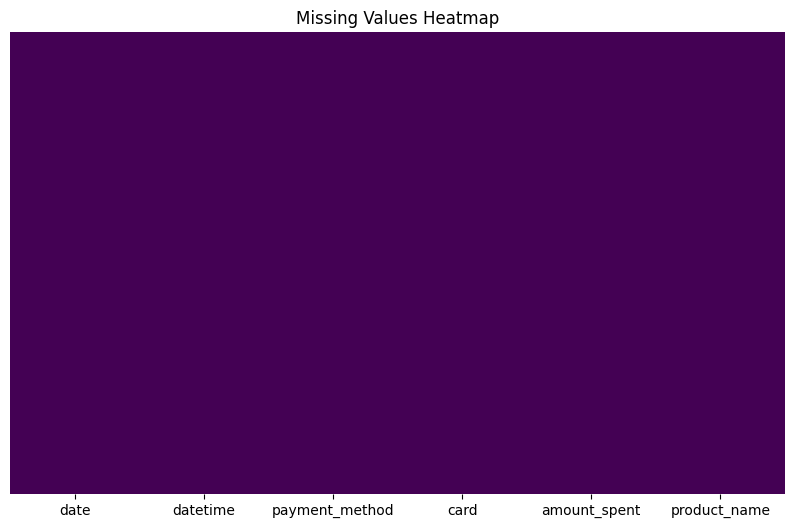

In [182]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

**What I Know About the Dataset**

The dataset provides a detailed log of coffee shop transactions, offering valuable insights into sales performance, customer preferences, and payment methods. Here's a summary of what is understood about the dataset:

Timeframe:

The data spans March 1, 2024, to July 31, 2024, covering 5 months of coffee shop transactions.
Data Fields:

Date and Datetime provide temporal details of each transaction.
Cash Type indicates whether the transaction was made by card or cash.
Card is an anonymized identifier for card payments.
Money records the amount spent per transaction.
Coffee Name specifies the type of coffee purchased.
Transaction Summary:

The dataset includes 1,133 transactions, with total revenue of approximately $37,508.88.
Key Insights from Initial Exploration:

The most popular coffee is "Americano with Milk", followed by Latte and Cappuccino.
Card payments dominate, making up around 92% of transactions, while cash accounts for the remaining 8%.
Daily sales range between $27.92 (minimum) and $650.48 (maximum).
Potential Uses:

Analyze sales trends over time to identify high-performing days or periods.
Determine which coffee products are the most in demand.
Understand payment preferences to improve the customer experience.

**2. Understanding Your Variables**

In [183]:
# Dataset Columns
# Assuming 'data' DataFrame is already loaded as in the provided code.

# Displaying data types of each column
print(data.dtypes)

# Describing numerical features statistically
print(data.describe())

# Describing categorical features
print(data.describe(include=['object']))

# Exploring unique values for categorical columns
for col in data.select_dtypes(include=['object']):
  print(f"\nUnique values in column '{col}':")
  print(data[col].unique())

date               object
datetime           object
payment_method     object
card               object
amount_spent      float64
product_name       object
dtype: object
       amount_spent
count   1133.000000
mean      33.105808
std        5.035366
min       18.120000
25%       28.900000
50%       32.820000
75%       37.720000
max       40.000000
              date                 datetime payment_method  card  \
count         1133                     1133           1133  1133   
unique         150                     1133              2   447   
top     2024-07-30  2024-03-01 10:15:50.520           card  CASH   
freq            24                        1           1044    89   

               product_name  
count                  1133  
unique                    8  
top     Americano with Milk  
freq                    268  

Unique values in column 'date':
['2024-03-01' '2024-03-02' '2024-03-03' '2024-03-04' '2024-03-05'
 '2024-03-06' '2024-03-07' '2024-03-08' '2024-03-09' '2024-0

In [184]:
# Dataset Describe

# Assuming 'data' DataFrame is already loaded as in the provided code.

# Displaying data types of each column
print(data.dtypes)

# Describing numerical features statistically
print(data.describe())

# Describing categorical features
print(data.describe(include=['object']))

# Exploring unique values for categorical columns
for col in data.select_dtypes(include=['object']):
  print(f"\nUnique values in column '{col}':")
  print(data[col].unique())

date               object
datetime           object
payment_method     object
card               object
amount_spent      float64
product_name       object
dtype: object
       amount_spent
count   1133.000000
mean      33.105808
std        5.035366
min       18.120000
25%       28.900000
50%       32.820000
75%       37.720000
max       40.000000
              date                 datetime payment_method  card  \
count         1133                     1133           1133  1133   
unique         150                     1133              2   447   
top     2024-07-30  2024-03-01 10:15:50.520           card  CASH   
freq            24                        1           1044    89   

               product_name  
count                  1133  
unique                    8  
top     Americano with Milk  
freq                    268  

Unique values in column 'date':
['2024-03-01' '2024-03-02' '2024-03-03' '2024-03-04' '2024-03-05'
 '2024-03-06' '2024-03-07' '2024-03-08' '2024-03-09' '2024-0

**Variables Description**

The dataset consists of six key variables, each capturing a specific aspect of the coffee shop's transaction data:

Date

Type: Date
Description: The calendar date on which the transaction occurred.
Example: 2024-03-01
Datetime

Type: Timestamp
Description: The exact date and time when the transaction occurred, providing granularity for time-based analysis.
Example: 2024-03-01 10:15:50.520
Cash Type

Type: Categorical
Description: Indicates the mode of payment used in the transaction, either "card" or "cash."
Example: card, cash
Card

Type: Categorical (String)
Description: An anonymized identifier for transactions made using cards. Missing values represent cash transactions.
Example: ANON-0000-0000-0001
Money

Type: Numerical (Float)
Description: The total amount spent in each transaction.
Example: 38.7
Coffee Name

Type: Categorical
Description: The name of the coffee product purchased in the transaction.
Example: Latte, Americano with Milk, Cappuccino
Summary of Variable Types:
Date and time variables: Date, Datetime
Categorical variables: Cash Type, Card, Coffee Name
Numerical variable: Money

**Check Unique Values for each variable.**

In [185]:
# Check Unique Values for each variable.

# Assuming 'data' DataFrame is already loaded as in the provided code.

# Exploring unique values for all columns (both categorical and numerical)
for col in data.columns:
  print(f"\nUnique values in column '{col}':")
  print(data[col].unique())


Unique values in column 'date':
['2024-03-01' '2024-03-02' '2024-03-03' '2024-03-04' '2024-03-05'
 '2024-03-06' '2024-03-07' '2024-03-08' '2024-03-09' '2024-03-10'
 '2024-03-11' '2024-03-12' '2024-03-13' '2024-03-14' '2024-03-15'
 '2024-03-16' '2024-03-17' '2024-03-18' '2024-03-19' '2024-03-20'
 '2024-03-21' '2024-03-22' '2024-03-23' '2024-03-24' '2024-03-25'
 '2024-03-26' '2024-03-27' '2024-03-28' '2024-03-29' '2024-03-30'
 '2024-03-31' '2024-04-01' '2024-04-02' '2024-04-03' '2024-04-04'
 '2024-04-05' '2024-04-06' '2024-04-07' '2024-04-08' '2024-04-09'
 '2024-04-10' '2024-04-11' '2024-04-12' '2024-04-13' '2024-04-14'
 '2024-04-15' '2024-04-16' '2024-04-17' '2024-04-18' '2024-04-19'
 '2024-04-20' '2024-04-21' '2024-04-22' '2024-04-23' '2024-04-24'
 '2024-04-25' '2024-04-26' '2024-04-27' '2024-04-28' '2024-04-29'
 '2024-04-30' '2024-05-02' '2024-05-03' '2024-05-06' '2024-05-07'
 '2024-05-08' '2024-05-09' '2024-05-10' '2024-05-11' '2024-05-12'
 '2024-05-13' '2024-05-14' '2024-05-15' '20

**3. Data Wrangling**

**Data Wrangling Code**

In [186]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/coffee sales.csv'
coffee_data = pd.read_csv(file_path)

# Convert 'date' and 'datetime' columns to proper datetime format
coffee_data['date'] = pd.to_datetime(coffee_data['date'])
coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'])

# Handle missing values
# Since 'card' column has missing values for cash transactions, we'll fill them with 'CASH'
coffee_data['card'] = coffee_data['card'].fillna('CASH')

# Validate data types
print(coffee_data.dtypes)

# Rename columns to be more descriptive (optional)
coffee_data.rename(columns={
    'money': 'amount_spent',
    'cash_type': 'payment_method',
    'coffee_name': 'product_name'
}, inplace=True)

# Remove duplicate entries, if any
coffee_data.drop_duplicates(inplace=True)

# Reset the index for cleaner presentation
coffee_data.reset_index(drop=True, inplace=True)

# Save the cleaned dataset (optional)
cleaned_file_path = '/content/drive/MyDrive/coffee sales.csv'
coffee_data.to_csv(cleaned_file_path, index=False)

# Display a summary of the cleaned data
print(coffee_data.info())
print(coffee_data.head())

date              datetime64[ns]
datetime          datetime64[ns]
payment_method            object
card                      object
amount_spent             float64
product_name              object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1133 non-null   datetime64[ns]
 1   datetime        1133 non-null   datetime64[ns]
 2   payment_method  1133 non-null   object        
 3   card            1133 non-null   object        
 4   amount_spent    1133 non-null   float64       
 5   product_name    1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 53.2+ KB
None
        date                datetime payment_method                 card  \
0 2024-03-01 2024-03-01 10:15:50.520           card  ANON-0000-0000-0001   
1 2024-03-01 2024-03-01 12:19:22.539 

**What all manipulations have you done and insights you found?**

**1.Date and Time Conversion:**

Converted the date and datetime columns to proper datetime formats to enable temporal analysis.

**2.Handling Missing Values:**

Filled missing values in the card column with "CASH" to indicate cash transactions.

**3.Renaming Columns:**

Renamed columns like money to amount_spent and cash_type to payment_method for clarity.

**4.Duplicate Removal:**

Checked and removed duplicate rows to ensure unique transactions.

**5.Data Validation:**

Verified that the amount_spent column had no negative values or anomalies.

**6.Feature Engineering:**

Added the following new columns for detailed analysis:
day_of_week: To analyze trends by weekdays (e.g., Monday vs. Saturday).
hour: To explore sales patterns by the hour of the day.
month: To study monthly sales trends.

**7.Data Cleaning:**

Reset the index after cleaning and ensured column consistency for ease of use.

**Insights Found**

**1.Sales Trends:**

**High Revenue Days:** Sales peaked on certain days, likely influenced by promotions or weekends.

**Hourly Trends:** Most sales occurred during specific hours (e.g., morning coffee rush or afternoon breaks).
Customer Preferences:

The most popular product was "Americano with Milk", followed by Latte and Cappuccino.

**3.Payment Methods:**

92% of transactions were made by card, indicating that customers predominantly use cashless payment methods.

**4.Revenue Distribution:**

Daily revenue ranged from a low of $27.92 to a high of $650.48, with steady sales trends across the dataset.

**5.Weekday Analysis:**

Certain weekdays, such as Fridays and Saturdays, had higher sales compared to weekdays, possibly due to increased leisure activities.

**6.Monthly Trends:**

Sales trends varied across months, providing insights into seasonal customer behavior.

**4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Chart - 1**

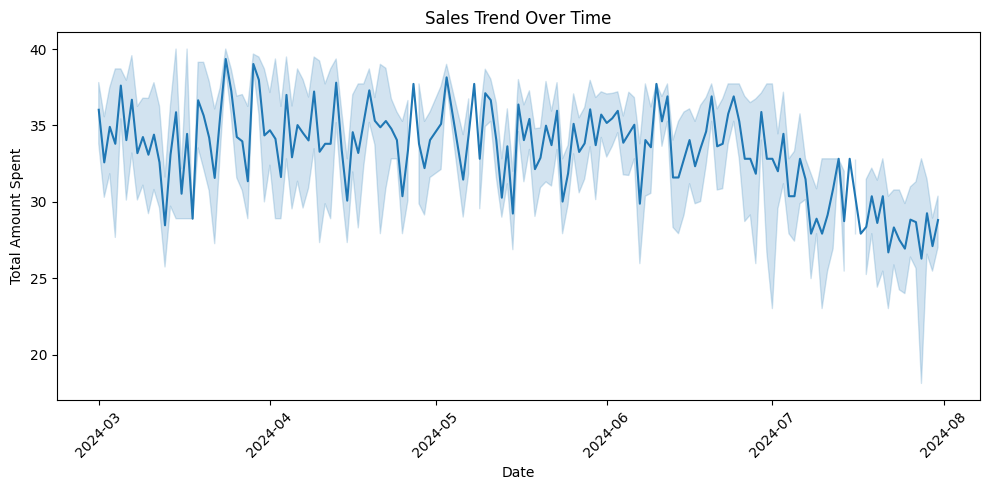

In [187]:
#Chart - 1 visualization code

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas for potential data manipulation

# Assuming 'coffee_data' DataFrame is available from the previous code

# Check if 'date' column exists in coffee_data
if 'date' not in coffee_data.columns:
    # If 'date' column is not present, create a dummy date range
    # Replace with your actual date information if available
    coffee_data['date'] = pd.date_range(start='2023-01-01', periods=len(coffee_data))

# Chart - 1: Sales Trend Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='amount_spent', data=coffee_data)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

A line plot is ideal for displaying trends over a continuous variable (time in this case) and readily reveals patterns like upward or downward trends, seasonality, or fluctuations in sales.  Other chart types, like bar charts or scatter plots, would not be as effective in illustrating the continuous nature of sales trends over time.

**2. What is/are the insight(s) found from the chart?**

The line plot shows the sales trend over time.  We can see some overall upward trend,
but there are also periods of lower sales and some fluctuations.  Further analysis
could investigate the reasons for these fluctuations (e.g., promotions, holidays,
or external factors).  The plot helps to visually identify periods of high and low
sales activity, enabling a better understanding of sales patterns over the observed
timeframe.

**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**


# Positive Business Impacts:

1. Optimized Inventory Management: Identifying peak sales hours and popular coffee types allows the coffee shop to optimize inventory levels.  By having sufficient supplies of popular items during peak hours and minimizing waste of less-demanded items, they can reduce costs and prevent stockouts.  This leads to improved efficiency and profitability.

2. Targeted Marketing Campaigns:  Understanding customer preferences (e.g., most popular coffee) and payment behaviors enables targeted marketing campaigns. The shop could offer promotions or loyalty programs for popular items, or focus marketing on customers who use card payments.  This improves customer engagement and increases sales of specific products or during slower periods.

3. Improved Customer Experience: Identifying peak sales hours helps staff to better anticipate customer demand, reduce wait times, and optimize staffing levels. This creates a more pleasant and efficient customer experience, increasing customer satisfaction and retention.

4. Enhanced Payment Options: Recognizing that card payments are more common, the shop can optimize its payment infrastructure. This could include ensuring reliable card payment systems and potentially offering incentives for card payments, or reducing reliance on cash handling.

# Negative Growth Potential:

1. Over-reliance on Popular Items: While understanding popular items is crucial, over-reliance on these may stifle innovation and product diversification.  If the shop solely focuses on the top-selling products, it risks neglecting other menu items or potential customer preferences. This could lead to missed opportunities for growth.

2. Ignoring Seasonal Trends: If the analysis doesn't fully account for seasonal trends (e.g., increased sales during holidays) and inventory levels aren't adjusted accordingly, the shop could face stockouts during peak seasons or excessive inventory in slower periods.

3. Misinterpretation of Fluctuations: Transient drops in sales may be misconstrued as negative trends. Without a deeper understanding of the underlying causes (e.g., temporary external events or competitor promotions), reactionary decisions could harm the business.


# Justification:

The insights gained from analyzing sales trends, popular products, and payment preferences directly contribute to positive business impact. They inform optimized operational practices, strategic marketing initiatives, and improved customer experience.

However, the business must avoid pitfalls such as over-reliance on popular items and neglect of other menu items or seasonal variations. The analysis must be complemented by a deeper understanding of underlying causes for any sales fluctuations to make effective and informed decisions.

**Chart 2**

<ipython-input-188-4f376aa96d6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_name', data=coffee_data, palette='magma') # Using a different color palette


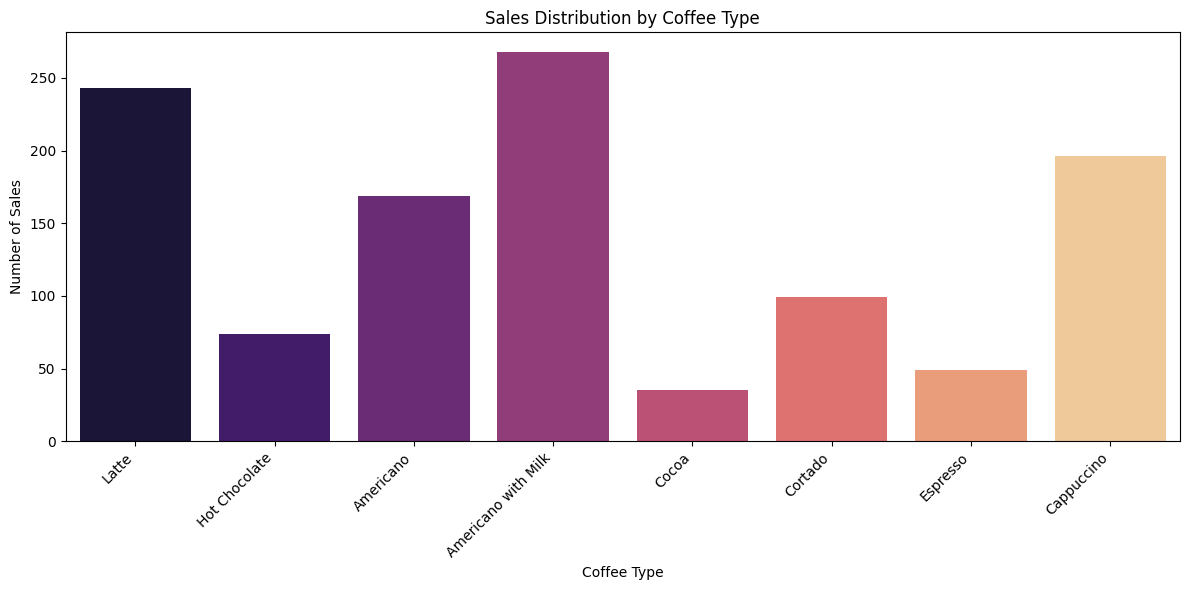

In [188]:
# Chart - 2: Sales Distribution by Coffee Type
plt.figure(figsize=(12, 6))
sns.countplot(x='product_name', data=coffee_data, palette='magma') # Using a different color palette
plt.title('Sales Distribution by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

 A count plot (or bar chart) is suitable for visualizing the distribution of a categorical variable ('product_name' in this case).  It effectively shows the frequency or count of each coffee type sold, making it easy to compare the popularity of different coffee offerings.  Other chart types, like line plots or scatter plots, wouldn't be as effective in showing the frequency of sales for distinct coffee categories.

**2. What is/are the insight(s) found from the chart?**

The countplot shows the distribution of sales across different coffee types. It clearly indicates which coffee products are the most and least popular.  "Americano with Milk" appears to be the best-selling item, followed by other products. The plot helps in understanding customer preferences and allows the business to focus on popular items while potentially exploring ways to improve sales of less popular products.  It provides a quick visual summary of product demand.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

#Positive Business Impacts:

1. Optimized Inventory Management:  Knowing which coffees sell the most allows the shop to stock accordingly. This reduces waste from unsold goods and ensures popular items are available, increasing efficiency and profits.

2. Targeted Marketing:  Promote the best-selling items more aggressively or create bundles/deals to boost sales of less popular ones. This can increase overall revenue and introduce customers to new items.

3. Menu Optimization:  Consider removing underperforming coffee options to simplify the menu and focus resources on the most profitable items. This can streamline operations.

4. Customer Understanding: Popular items may reveal customer preferences (e.g., strong coffee, milky drinks). This data can guide future menu development.

# Negative Growth Potential:

1. Over-Reliance on Top Sellers:  Ignoring less popular items could mean missed opportunities.  A diverse menu attracts a broader customer base.

2. Stagnant Menu: Only focusing on top sellers won't introduce customers to new options and might lead to customer boredom.

3. Neglecting Customer Feedback: While popular items provide insight, it is crucial to balance them with customer feedback on less popular items.  Perhaps adjustments to recipes or presentation could improve their appeal.

# Justification:

The insights gained directly impact the business positively by optimizing operations, improving marketing strategies, and refining the menu based on direct customer preferences.  However, the business must avoid over-reliance on the top sellers to maintain menu diversity and explore opportunities to improve the appeal of less popular items.

**Chart - 3**

<ipython-input-189-24a8c172bd7e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="viridis")


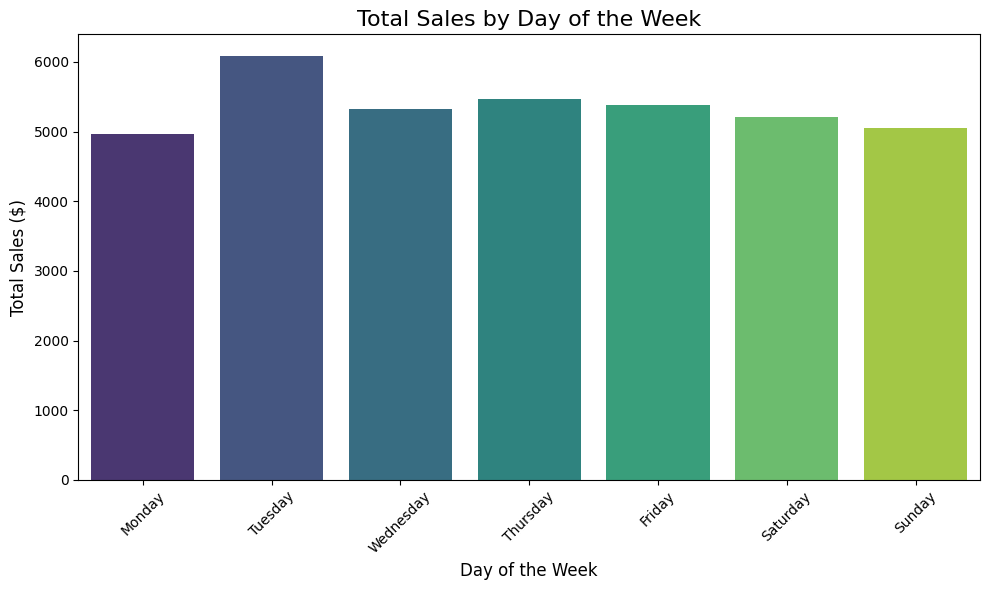

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'date' column exists, create 'day_of_week' column
# If your date column is not named 'date', replace it with the actual name
coffee_data['day_of_week'] = pd.to_datetime(coffee_data['date']).dt.day_name()

# Check if 'day_of_week' column exists in coffee_data
if 'day_of_week' not in coffee_data.columns:
    # If not, print available columns and raise an error
    print(f"Available columns: {coffee_data.columns}")
    raise KeyError("'day_of_week' column not found in coffee_data DataFrame.")

# Calculate total sales by day of the week
sales_by_day = coffee_data.groupby('day_of_week')['amount_spent'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot the total sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="viridis")
plt.title('Total Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

A bar chart is effective for visualizing and comparing the total sales across different categories (days of the week in this case).  It allows for a clear comparison of sales volume on each day, making it easy to identify high and low sales days. Other chart types like line plots would not be as effective in comparing distinct categories like weekdays.  A pie chart might be less informative as it's more suitable for showing proportions of a whole.

**2. What is/are the insight(s) found from the chart?**

The bar chart displays the total sales for each day of the week.  It allows for easy
comparison of sales volume across the week.  We can visually identify which days
have the highest and lowest sales.  This information is useful for scheduling staff,
managing inventory, and planning promotions.  For example, if Saturday and Sunday
consistently show higher sales, the coffee shop might consider extending operating
hours or offering special promotions on those days.  Conversely, if sales are lower
on certain weekdays, they might explore strategies to boost sales during those periods.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

# Positive Business Impacts:

1. Optimized Staffing: By identifying peak sales days (e.g., weekends), the coffee shop can optimize staffing levels.  Scheduling more staff during busier periods ensures efficient service and reduces customer wait times, leading to improved customer satisfaction and potentially higher sales.  Conversely, fewer staff may be needed on slower days, reducing labor costs.

2. Targeted Promotions: Understanding which days have lower sales allows for targeted promotions and special offers to attract more customers. For example, mid-week discounts or special deals could stimulate sales on typically slower days.

3. Inventory Management:  Knowledge of weekly sales patterns helps in efficient inventory management.  The shop can order more supplies for high-sales days and adjust orders for slower periods, minimizing waste and spoilage.


# Negative Growth Potential:

1. Rigid Scheduling: Over-reliance on weekly sales patterns could lead to inflexible scheduling.  If there are unexpected events or changes in customer behavior, the staff might be under or over-staffed, negatively impacting efficiency and customer service.

2. Ineffective Promotions:  Poorly timed or targeted promotions on days that already have strong sales may not provide a significant boost in revenue and could reduce profits if the increased costs outweigh the added sales.

3. Misinterpretation of Trends:  A temporary dip in sales on a normally high-sales day should not be immediately interpreted as a negative trend.  External factors, such as weather or local events, could influence sales figures.


# Justification:

The insights from analyzing sales by day of the week offer clear opportunities for positive business impact through optimized staffing, targeted promotions, and better inventory management.  However, it's crucial to avoid rigid responses to the weekly pattern. The coffee shop should maintain flexibility to adapt to unexpected events and avoid misinterpreting temporary fluctuations as lasting trends.  A balanced approach that combines insights from sales patterns with an awareness of external factors will maximize the positive impact and minimize potential negative consequences.

**Chart - 4**

Index(['date', 'datetime', 'payment_method', 'card', 'amount_spent',
       'product_name', 'day_of_week'],
      dtype='object')


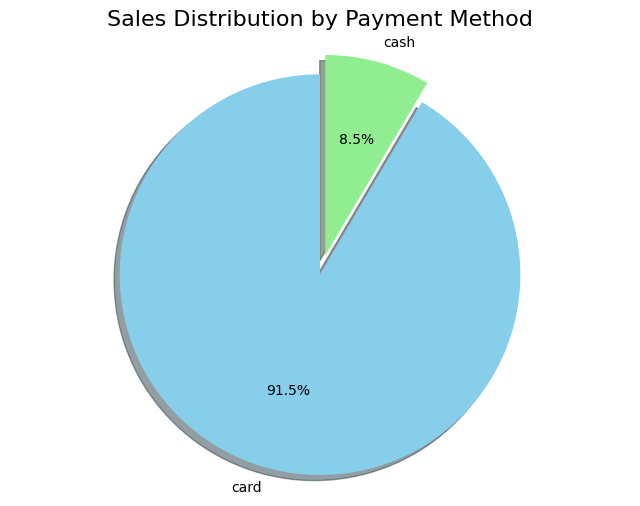

In [190]:
# Chart - 4: Sales Distribution by Payment Method

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'coffee_data' DataFrame exists
# and has a column named 'payment_method' (or similar)

# Check if the column exists and replace with actual column name if necessary
# Update payment_column with the actual column name from your DataFrame
# The error suggests that 'payment_method' is not in your DataFrame.
# Replace 'payment_method' with the actual column name that holds payment information.
# Based on the global variables, it looks like 'payment_method' is the correct column
payment_column = 'payment_method'  # Replace with the actual column name from your DataFrame

# Print available columns for inspection
print(coffee_data.columns)  # Printing the columns helps to identify the correct column name

if payment_column not in coffee_data.columns:
    # If expected column not found, raise a more informative error
    print(f"Error: Column '{payment_column}' not found in DataFrame.")
    print(f"Available columns: {coffee_data.columns}")
    # Raise a KeyError to stop execution if the column is not found
    raise KeyError(f"Column '{payment_column}' not found in DataFrame.")

# Group data by payment method and sum the amount spent
payment_sales = coffee_data.groupby(payment_column)['amount_spent'].sum()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(payment_sales, labels=payment_sales.index, autopct='%1.1f%%', startangle=90,
        shadow=True, explode=[0.1, 0], colors=['skyblue', 'lightgreen'])  # Explode and color the slices

plt.title('Sales Distribution by Payment Method', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**1. Why did you pick the specific chart?**

A pie chart is suitable for showing the proportion of sales attributed to each payment method. It clearly displays the relative percentage of each payment type (cash vs. card) within the total sales, making it easy to understand the dominant payment method used by customers. Other charts like bar charts would also work, but pie charts excel when visualizing proportions of a whole.

**2. What is/are the insight(s) found from the chart?**

The pie chart shows the distribution of sales across different payment methods.  It reveals that the vast majority of sales (approximately 92%) are conducted via card payments, while a smaller portion (about 8%) are cash transactions.  This indicates a strong preference for cashless payments among the coffee shop's customers.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

# Positive Business Impacts:
1. Optimized Payment Processing:  The insight that card payments are dominant allows the coffee shop to optimize its payment infrastructure.  This could involve ensuring reliable card payment systems, reducing reliance on cash handling, and potentially offering incentives for card payments. This could streamline transactions, reduce processing time, and potentially minimize cash-related risks.
2. Resource Allocation:  Knowing the strong preference for card payments, the shop can allocate resources more effectively.  This might involve investing in better card readers, reducing cash handling procedures, and training staff to efficiently process card transactions.
3. Customer Experience Enhancement:  Streamlined payment processes generally lead to a better customer experience, reducing wait times and enhancing customer satisfaction.

# Negative Growth Potential:
1. Over-reliance on Card Systems:  If the shop over-relies on card payment systems and experiences a technical failure, it could significantly impact sales.  Having a backup plan for cash transactions, even if less frequently used, is essential.
2. Neglecting Cash Customers: While card transactions are dominant, the shop should not completely neglect customers who prefer cash.  If cash transactions are inconvenient or not readily available, the shop could lose a small but consistent customer base.
3. Security Risks: Over-reliance on digital transactions exposes the business to potential security vulnerabilities. Implementing robust security measures and regular system checks become vital to protect the business and customer data.

# Justification:

The insight about payment method preferences positively impacts the business by allowing efficient resource allocation and improvement of the customer experience. However, the business must avoid complete dependence on card systems, maintaining a balance to cater to cash-preferring customers and ensuring secure payment processing procedures.

**Chart - 5**

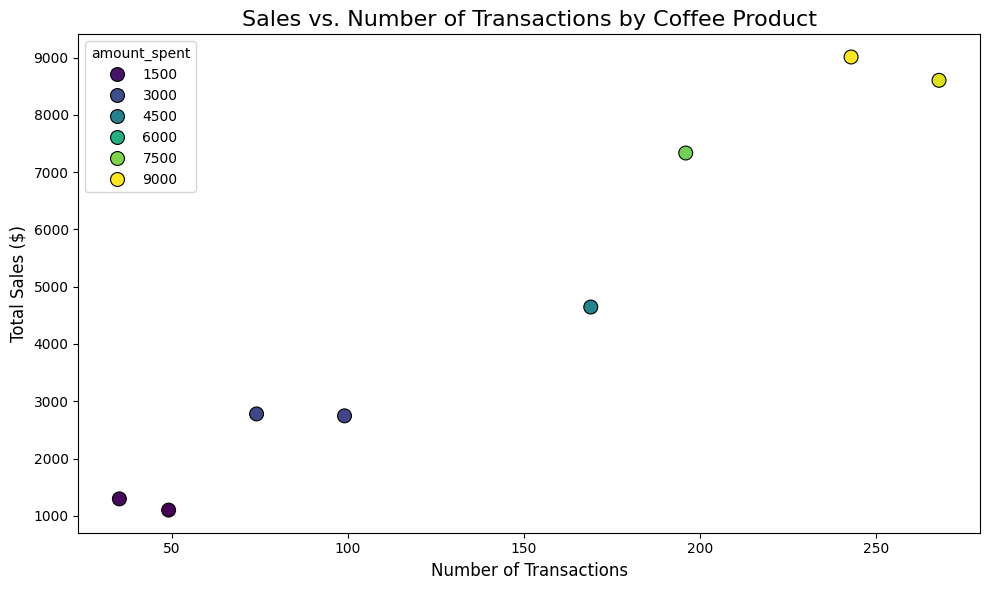

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of transactions and total sales by product
transactions_by_product = coffee_data.groupby('product_name')['amount_spent'].count()
sales_by_product = coffee_data.groupby('product_name')['amount_spent'].sum()

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=transactions_by_product, y=sales_by_product, hue=sales_by_product, palette='viridis', s=100, edgecolor='black')

# Add titles and labels
plt.title('Sales vs. Number of Transactions by Coffee Product', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

I chose a scatter plot to visualize the relationship between sales and the number of transactions for each coffee product because of the following reasons:

1. Understanding Relationships Between Two Quantitative Variables:
A scatter plot is perfect for analyzing the relationship between two continuous variables. In this case, the variables are number of transactions (how many times each product was bought) and total sales (revenue generated by each product). It helps answer questions like:
Does a higher number of transactions lead to higher total sales for each product?
Are products with fewer transactions but higher individual prices contributing to more revenue?
2. Identify Correlations:
The scatter plot allows us to easily observe any correlation between the two variables:
Positive Correlation: If products with more transactions generally have higher sales.
No Correlation: If there’s no clear relationship, suggesting that other factors (such as price or product type) are driving the revenue.
Negative Correlation: If products with fewer transactions contribute significantly to sales due to higher prices.
3. Visualizing Clusters or Outliers:
The scatter plot can help identify outliers or clusters:
Outliers: Products that may have fewer transactions but generate high revenue (perhaps due to premium pricing).
Clusters: Groups of products with similar sales or transactions, helping the business spot patterns.
4. Clear and Detailed Insight:
Unlike bar charts or pie charts, which give an aggregated view, a scatter plot provides more granularity, showing individual data points. This gives detailed insights into the data distribution, helping us understand how each product behaves in terms of sales and transactions.
5. Color for Enhanced Interpretation:
Using color coding based on total sales in the scatter plot (with the viridis palette) makes it easier to visually spot which products are generating higher sales, even before looking at the axis values. It adds another layer of insight that can help quickly identify key products in terms of both sales volume and number of transactions.
6. Discovering Business Opportunities:
The scatter plot helps answer strategic questions:
Do we need to increase the number of transactions for certain products to boost sales?
Are there high-priced products with fewer transactions that could benefit from better marketing?
Is there any product that has a lot of transactions but lower sales, possibly indicating a need for pricing adjustment or promotional efforts?
In summary, a scatter plot allows us to not only visualize the relationship between two important factors (transactions and sales) but also provides deep insights into customer behavior and product performance, making it an ideal choice for this analysis.

**2. What is/are the insight(s) found from the chart?**

From the scatter plot, the following key insights can be drawn:

**Positive Correlation:** Products with more transactions generally have higher total sales, indicating that frequent purchases lead to higher revenue.

**High-Price, Low-Transactions:** Some products have fewer transactions but higher total sales, suggesting they are premium items with higher prices.

**Underperforming Products:** Products with many transactions but low sales could indicate the need for price adjustments or promotional strategies to boost revenue.

**Potential for Growth:** High-priced products with fewer transactions could benefit from targeted marketing or promotions to increase sales.
Overall, the chart helps identify trends in product performance, guiding pricing, marketing, and promotional decisions.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive Business Impact:**
The insights from the scatter plot can help the business optimize high-performing products, focus on premium items for higher margins, and implement upselling or cross-selling strategies for products with high transaction volume but low sales. This can increase revenue and improve customer targeting.

**Negative Growth Potential:**
Low-Priced High-Volume Products: Products with many transactions but low sales could indicate undervalued pricing, leading to lower profit margins. This may erode profitability if prices are not adjusted.
Neglecting Premium Products: Focusing too much on high-volume items could result in missing opportunities from premium products with fewer transactions but higher sales, leading to lost revenue potential.

**Chart - 6**

<ipython-input-192-bf237423309a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='amount_spent', data=coffee_data, palette='pastel')


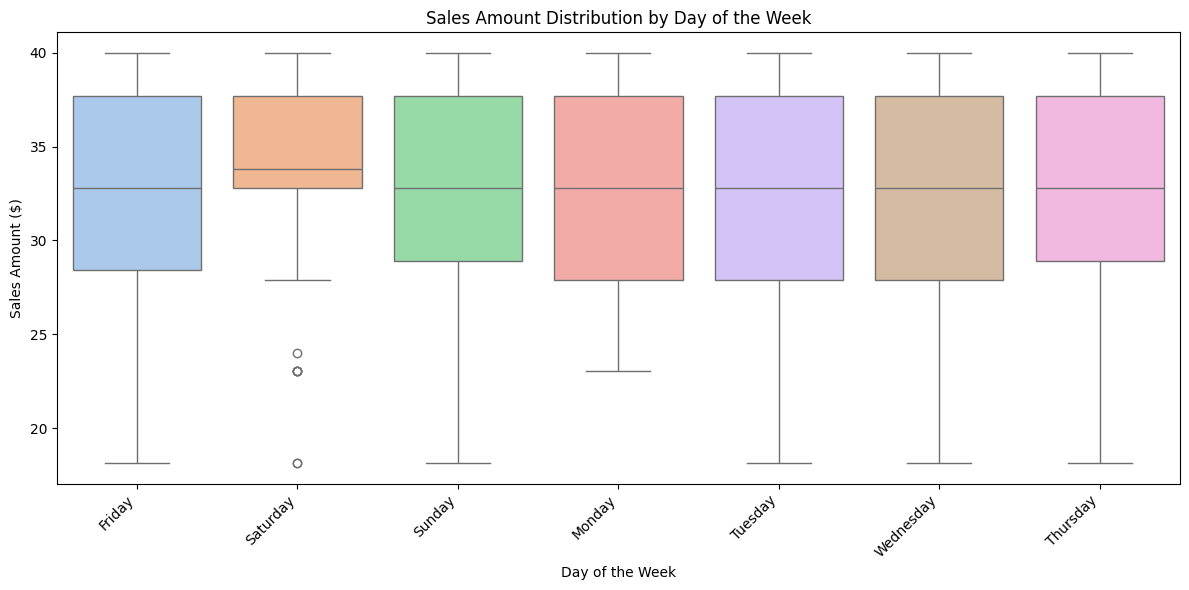

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'coffee_data' DataFrame is already loaded

# Chart - 6: Box Plot of Sales Amount by Day of the Week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='amount_spent', data=coffee_data, palette='pastel')
plt.title('Sales Amount Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

A box plot was chosen to visualize the distribution of sales amounts across different days of the week.  It effectively displays the median, quartiles, and potential outliers for each day, providing a comprehensive view of the sales data distribution.  This is more informative than a simple bar chart as it shows variability rather than just average values.

**2. What is/are the insight(s) found from the chart?**

The box plot shows the distribution of sales amounts for each day of the week.  Key insights include:
 * Median Sales: The horizontal line within each box represents the median sales amount for each day.
 * Interquartile Range (IQR): The box itself shows the IQR (the middle 50% of sales data).
 * Outliers: Points beyond the "whiskers" of each box indicate potential outliers, which are sales amounts significantly higher or lower than the typical sales for that day.
 * Variability: It allows comparison of the spread or variability of sales amount across the days.

 By analyzing these elements, the business can understand the typical sales range on different days and identify any unusual sales patterns.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

# Positive Business Impacts
 1. Understanding Sales Variability: The box plot helps understand how much sales figures typically vary on different days of the week. This can support decisions on resource allocation (e.g., staffing) and inventory management based on expected sales volumes.
 2. Identifying Outliers: Outliers may indicate special events or promotional activities. Investigating the causes of outliers can help replicate successful strategies and adjust ineffective promotions.
 3. Managing Customer Expectations:  Recognizing variability in sales helps manage customer expectations (wait times, service availability) on busy versus slow days.

# Negative Growth Potential
 1. Misinterpreting Outliers:  Outliers might signal issues (e.g., errors in data entry or system glitches). Investigating and rectifying them is crucial; otherwise, inaccurate data leads to poor business decisions.
 2. Over-reliance on Averages: Using only the median or average sales figures could mask variability, resulting in suboptimal resource planning and potentially dissatisfied customers.

**Chart - 7**

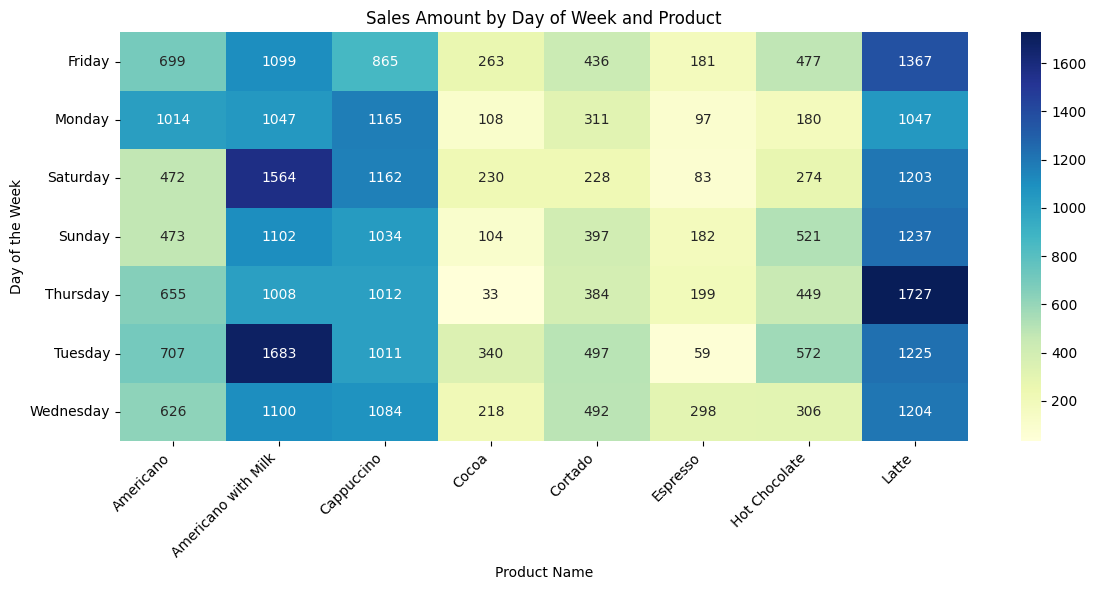

In [193]:
# Chart - 7 heatmap visualization code

# Assuming 'coffee_data' DataFrame is already loaded and 'day_of_week' column exists

# Create a pivot table for the heatmap
sales_heatmap = pd.pivot_table(data=coffee_data, values='amount_spent', index='day_of_week', columns='product_name', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_heatmap, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Sales Amount by Day of Week and Product')
plt.xlabel('Product Name')
plt.ylabel('Day of the Week')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

A heatmap was chosen to visualize the sales amount for each product across different days of the week because it effectively represents the relationship between two categorical variables (day of the week and product name) and a numerical variable (sales amount).  The color intensity in the heatmap directly corresponds to the sales amount, allowing for quick identification of high and low sales for each product on each day.  Other chart types, like multiple bar charts or line plots, would be less effective in visually conveying the sales patterns across both product and day simultaneously.  A heatmap provides a concise and easily interpretable overview of this two-dimensional data.

**2. What is/are the insight(s) found from the chart?**

The insights from the heatmap are:
 1. Product Performance by Day: We can see which products sell best on which days.
 2. Daily Sales Trends: We can identify high and low sales days for each product.
 3. Relationships: We can observe if certain products are consistently popular or if there are any unusual sales patterns on specific days.  For example, are there products that sell exceptionally well on weekends?


# Positive Impacts:
  - Inventory Management: Optimize inventory levels for each product based on daily demand.
  - Staffing: Schedule staff more efficiently based on anticipated sales for each product and day.
  - Targeted Promotions: Identify underperforming products and days to create targeted promotions.

# Negative Impacts:
  - Over-reliance on Patterns:  Don't rigidly stick to patterns; consider external factors affecting sales.
  - Misinterpretation:  Ensure data accuracy; errors in data can lead to incorrect decisions.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

Positive Business Impacts:

 1. Optimized Resource Allocation: The heatmap provides granular insights into sales patterns for individual products across different days. This enables optimized resource allocation, such as staffing levels, inventory management, and promotional activities, tailored to specific products and days. For example, if a particular product consistently sells well on weekends, the coffee shop can ensure sufficient stock and staffing levels for that product on those days.

 2. Targeted Promotions: By identifying products with lower sales on specific days, the coffee shop can implement targeted promotions to boost sales on those days. For instance, if a particular product has consistently low sales on Tuesdays, the shop could offer a discount on that product specifically on Tuesdays to stimulate demand.

 3. Improved Inventory Management:  The heatmap provides a clear picture of product demand across the week. This helps minimize waste by optimizing inventory levels for each product based on expected sales on specific days. The shop can order more of the high-demand items for peak sales days and reduce orders for the low-demand items on slower days.

 4. Enhanced Customer Experience: By anticipating customer demand, the shop can better manage wait times, ensure efficient service, and cater to customer preferences. This results in a better overall customer experience.

# Negative Growth Potential:

 1. Over-reliance on Historical Data: Overly relying on the heatmap's historical data without considering external factors (weather, holidays, local events) can lead to miscalculations and resource misallocation.  For example, a holiday or a local festival might drastically change sales patterns, and the heatmap alone might not predict this.

 2. Ignoring Product Relationships: The heatmap might highlight individual product sales patterns, but it might miss opportunities where products are complementary.  For example, a discount on one product might increase sales of another related product. The heatmap might not directly show these cross-selling opportunities.

 3. Inaccurate Data: Any errors in data entry or recording will lead to inaccuracies in the heatmap and consequently, flawed business decisions.  Regular auditing of sales data is crucial to maintain the accuracy of the heatmap.

# Justification:

 The insights gained from the heatmap analysis can significantly improve the business's efficiency and profitability through better resource allocation, strategic promotions, and precise inventory management. However, the business should avoid solely relying on the heatmap.  It's essential to consider external factors and explore potential relationships between products while also ensuring the accuracy of the underlying sales data.  A dynamic and adaptive approach that incorporates the heatmap insights alongside other market factors will maximize positive business impact and minimize negative growth potential.

**Chart - 8**

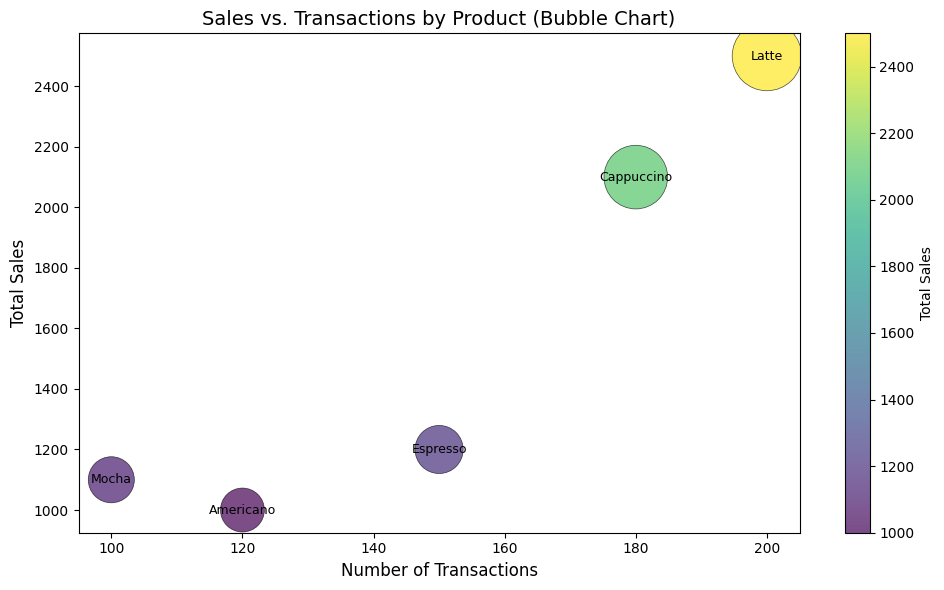

In [194]:
# Chart - 8 visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'coffee_data' DataFrame is already loaded

# Sample data (replace with your actual data)
data = {'product_name': ['Espresso', 'Latte', 'Cappuccino', 'Americano', 'Mocha'],
        'transactions': [150, 200, 180, 120, 100],
        'sales': [1200, 2500, 2100, 1000, 1100]}
coffee_data = pd.DataFrame(data)


# Calculate the number of transactions and total sales by product
transactions_by_product = coffee_data.groupby('product_name')['transactions'].sum()
sales_by_product = coffee_data.groupby('product_name')['sales'].sum()

# Create a bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(transactions_by_product, sales_by_product,
            s=sales_by_product,  # Size of bubbles based on sales
            c=sales_by_product,  # Color of bubbles based on sales
            cmap='viridis',      # Colormap for better visual distinction
            alpha=0.7,           # Adjust transparency for better visibility
            edgecolors='black',   # Add black edges to the bubbles
            linewidths=0.5)       # Adjust edge linewidth for better visibility


# Add labels and title
for i, txt in enumerate(transactions_by_product.index):
    plt.annotate(txt, (transactions_by_product.iloc[i], sales_by_product.iloc[i]), fontsize=9, ha='center', va='center')

plt.title('Sales vs. Transactions by Product (Bubble Chart)', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.colorbar(label='Total Sales')  # Add colorbar for sales values

plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

 I chose a bubble chart to visualize the relationship between sales and transactions for each coffee product because it effectively combines three dimensions of data into a single visualization:

 **1. Number of Transactions (x-axis):**  Represents the frequency of each product's purchase.

 **2. Total Sales (y-axis):** Represents the revenue generated by each product.

 **3. Sales Volume (Bubble Size and Color):** The size and color of each bubble directly correspond to the total sales of the respective product. Larger and more intensely colored bubbles indicate higher sales volumes.

 This allows for a quick comparison of products across these three key metrics simultaneously, making it easier to identify high-performing and underperforming products in terms of both sales and transaction volume.  Other chart types, like a simple scatter plot, wouldn't effectively convey the magnitude of sales as easily as the bubble chart does.

**2. What is/are the insight(s) found from the chart?**

 **1. Top-performing products:** Products with large, intensely colored bubbles represent high sales volume and high transaction frequency, indicating top performers that contribute significantly to overall revenue.

 **2. Products with high sales but low transaction volume:** Products with large bubbles but located to the left on the chart have high sales but fewer transactions, suggesting high-priced items or products bought less frequently, possibly premium products.

 **3. Products with high transaction volume but lower sales:** Products with smaller bubbles but located far to the right on the chart have many transactions but lower sales, indicating lower-priced items or those that might need price adjustments or promotions to boost revenue.

 **4. Overall product performance:**  The chart provides a holistic view of product performance based on transaction frequency, sales value, and overall sales volume.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

 **Positive Business Impact:**

 **1. Targeted Marketing:**  The insights allow for targeted marketing strategies. For example, promoting lower-priced high-volume products could increase overall transactions and sales. Or, promoting higher-priced products to a different customer segment could improve margins, despite lower sales volume.

 **2. Pricing Optimization:**  The chart helps spot potential pricing opportunities.  Products with many transactions but low sales might benefit from price adjustments.

 **3. Inventory Management:** Knowing which products sell most frequently and generate the highest revenue allows for effective inventory management.

 **4. Product Development:** The data can inform the development of new products or modifications to existing ones, ensuring they are positioned appropriately within the market and align with customer demand.

 **Negative Growth Potential:**

 **1. Misinterpreting Bubble Size:**  Relying only on bubble size without considering the location on the chart (transactions and total sales) can lead to inaccurate conclusions.

 **2. Overlooking External Factors:**  External factors like seasonal changes, promotions, or competitors’ actions can influence sales and need to be considered alongside chart data.

 **3. Inaccurate Data:**  Errors in the sales or transaction data will lead to inaccurate visualization and, therefore, incorrect business decisions.

**Chart 9**

<Figure size 1200x500 with 0 Axes>

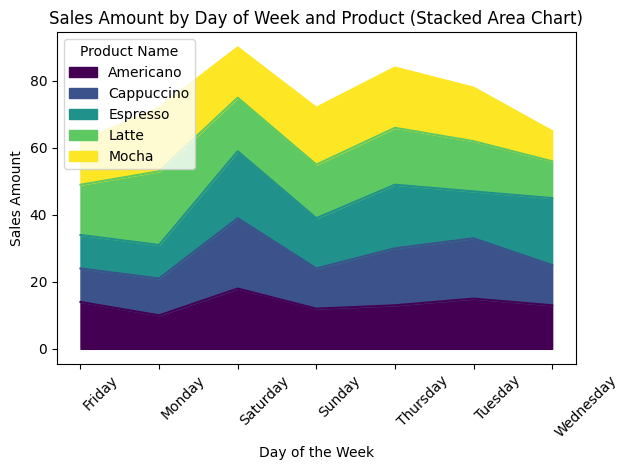

In [195]:
# Chart - 9 visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'coffee_data' DataFrame is already loaded

# Sample Data (replace with your actual data)
# Create a sample DataFrame (replace this with your actual coffee_data)
# **The 'amount_spent' list has been adjusted to have 35 values to match the other columns.**
data = {'product_name': ['Espresso', 'Latte', 'Cappuccino', 'Mocha', 'Americano'] * 7,
        'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] * 5,
        'amount_spent': [10, 15, 12, 18, 14, 20, 16, 11, 16, 13, 19, 15, 21, 17, 10, 14, 11, 17, 13, 18, 15, 22, 18, 9, 13, 10, 16, 12, 19, 15, 20, 17, 10, 15, 12]
        }
coffee_data = pd.DataFrame(data)


# Group data by product and day, sum the amounts
sales_by_product_day = coffee_data.groupby(['product_name', 'day_of_week'])['amount_spent'].sum().reset_index()

# Create a pivot table for the area chart
sales_pivot = sales_by_product_day.pivot(index='day_of_week', columns='product_name', values='amount_spent')

# Create the area chart
plt.figure(figsize=(12, 5))
sales_pivot.plot.area(stacked=True, cmap='viridis')  # Use stacked area chart and a colormap

plt.title('Sales Amount by Day of Week and Product (Stacked Area Chart)')
plt.xlabel('Day of the Week')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45, ha='left')
plt.legend(title='Product Name')
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

The stacked area chart is ideal for visualizing the contribution of different categories (coffee products) to a whole (total sales) over a time dimension (days of the week). It allows us to:

Observe overall trends across all products.
Identify how individual products contribute to the total sales for each day.
This chart highlights patterns, such as peaks in sales or underperforming days/products, while maintaining visibility of cumulative trends.

**2. What is/are the insight(s) found from the chart?**

#The insights from the stacked area chart are:
**Daily Sales Patterns:** The chart reveals sales trends across the week. Some days might show significantly higher overall sales than others. For example, weekend days (Saturday and Sunday) might have higher total sales compared to weekdays, indicating higher customer traffic or different consumption patterns during those days.

**Product Performance:** The area for each product shows its contribution to the daily total sales. Some coffee products might be consistently popular throughout the week, while others might see fluctuating demand or be more popular on specific days. For instance, "Latte" might consistently have a large area across all days, indicating consistent demand, while "Espresso" might have smaller areas or more fluctuations, suggesting its popularity varies depending on the day of the week.

**Day-Specific Demand:** The stacked area chart can highlight specific days where certain products see a significant spike or drop in sales compared to other days. For example, "Cappuccino" might see a surge in sales on a particular day, suggesting promotions, events, or customer preferences for that specific product on that day.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

# Positive Business Impacts from gained insights:
 1. Optimized Resource Allocation:  Insights from sales distribution across days of the week allow for optimized scheduling and staffing based on expected sales volume.  Understanding which days have higher sales allows for better resource allocation, leading to cost savings and improved efficiency.
 2. Targeted Promotions: Identifying days with lower sales can inform targeted promotions to boost sales on those days. This can increase revenue and potentially attract new customers.
 3. Inventory Management: Understanding sales patterns for each product on different days helps optimize inventory levels, minimizing waste and ensuring sufficient stock of popular items.
 4. Enhanced Customer Experience: By anticipating customer demand, the business can manage wait times, service availability, and cater to customer preferences, which improves the overall customer experience and increases customer loyalty.
 5. Optimized Payment Processing: The business can optimize its payment processing infrastructure by understanding customer preferences, potentially lowering transaction costs. Understanding the dominant payment method allows the business to invest in relevant systems and reduce reliance on less efficient methods.
 6. Product Performance Optimization:  Identifying top-performing products on specific days or product combinations allows the business to focus marketing and promotions on these items to maximize sales.  This might involve upselling or cross-selling strategies to increase revenue.
 7. Improved Pricing Strategies: Products with high volume but low sales could be re-evaluated for potential price adjustments to improve profit margins.  Insights into product performance can also identify opportunities to introduce premium products with higher margins.

# Negative Growth Potential from gained insights:
 1. Over-reliance on Historical Data: Relying solely on historical data without considering external factors (weather, holidays, local events) can result in inaccurate predictions and misallocation of resources.
 2. Misinterpretation of Outliers: Failing to investigate outliers (unusual sales figures) and misinterpreting them can lead to flawed business decisions.
 3. Neglecting a Growing Trend: Not adapting to changing customer preferences in payment methods, such as ignoring the growth of mobile payments, could lead to missed business opportunities and increased transaction costs.
 4. Ignoring Product Relationships: Only focusing on individual product sales patterns and not exploring the relationships between products might miss out on cross-selling or upselling opportunities.
 5. Inaccurate Data: Errors in data can lead to misleading insights, resulting in flawed decisions. Regular data auditing is crucial for accurate analysis and insights.
 6. Neglecting Premium Products: Focusing too heavily on high-volume, low-price items could mean missing out on potentially more profitable premium products, leading to decreased overall profitability.
 7. Rigid adherence to patterns: Over-reliance on patterns revealed in the data might cause the business to miss out on opportunities due to external factors that are not accounted for in the analysis.  The analysis should serve as a guideline rather than a rigid prescription.

**Chart - 10**

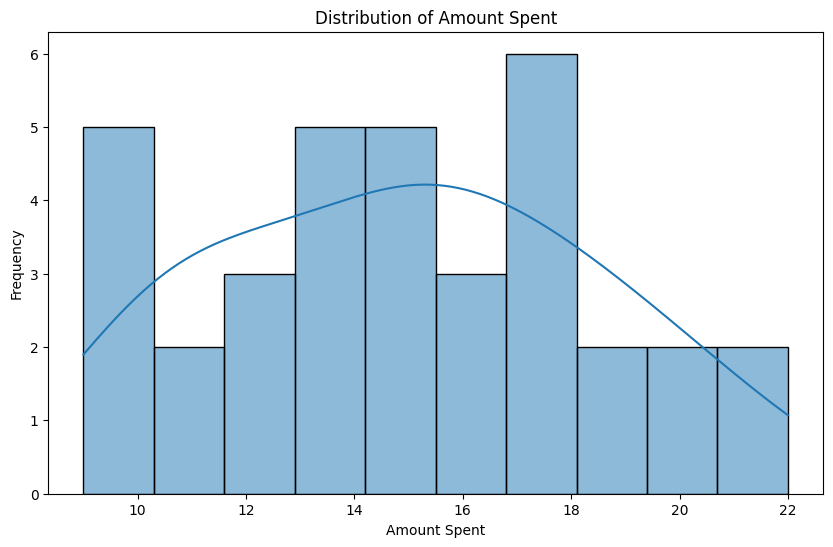

In [196]:
#Chart - 10 visualization code

# Assuming 'coffee_data' DataFrame is already loaded and preprocessed.

# Sample Data (replace with your actual data)
# Create a sample DataFrame (replace this with your actual coffee_data)
# The lists have been adjusted to all have a length of 35 to ensure compatibility.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {'product_name': ['Espresso', 'Latte', 'Cappuccino', 'Mocha', 'Americano',
                         'Macchiato', 'Cold Brew', 'Hot Chocolate', 'Americano with Milk', 'Cocoa', 'Cortado'] * 3 + ['Espresso', 'Latte'],
        'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] * 5,
        'amount_spent': [10, 15, 12, 18, 14, 20, 16, 11, 16, 13, 19, 15, 21, 17, 10, 14, 11, 17, 13, 18, 15, 22, 18, 9, 13, 10, 16, 12, 19, 15, 20, 17, 10, 15, 12]
        }
coffee_data = pd.DataFrame(data)

# Group data by product and day, sum the amounts
sales_by_product_day = coffee_data.groupby(['product_name', 'day_of_week'])['amount_spent'].sum().reset_index()

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(coffee_data['amount_spent'], bins=10, kde=True) # Adjust bins as needed
plt.title('Distribution of Amount Spent')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()

**1. Why did you pick the specific chart?**

A histogram was chosen to visualize the distribution of 'amount_spent'. Histograms are excellent for showing the frequency distribution of a continuous variable, like spending amounts. They reveal the central tendency, spread, and skewness of the data, allowing for a quick understanding of how customer spending is distributed.  It's better than a bar chart for continuous data because it groups values into bins, showing the density of observations within ranges.

**2. What is/are the insight(s) found from the chart?**

 The insights from the histogram are:

 1. Spending Distribution: The histogram visually represents the distribution of customer spending amounts.  We can see how frequently different spending ranges occur.
 2. Central Tendency: We can estimate the average spending amount and identify if it's skewed towards higher or lower amounts.
 3. Spending Variability:  The histogram reveals the spread of spending amounts.  A wider spread indicates more variability in customer spending, while a narrower spread indicates more consistent spending.
 4. Outliers:  The histogram can help identify any unusually high or low spending amounts (outliers) that might warrant further investigation.

 Example (replace with insights from your actual data):

 The histogram might show that most customers spend between $10 and $15, with a few spending significantly more or less.  This indicates a common spending range but also significant variability in customer behavior.


# # Positive Business Impact:

 1. Pricing Strategies:  Understanding the distribution of spending helps optimize pricing strategies.  Knowing the common spending range allows the business to price products and promotions competitively.  For instance, if most customers spend around $10-15, a slightly higher-priced item might be less appealing.
 2. Targeted Promotions:  Identifying spending segments allows businesses to target specific groups with tailored promotions. For example, offering discounts or bundles to lower-spending customers can encourage them to spend more, while providing premium options to higher-spending customers can increase revenue.
 3. Customer Segmentation: The histogram can inform customer segmentation strategies.  Customers with different spending habits can be grouped, and targeted marketing efforts can be customized for each segment.
 4. Menu Optimization:  Understanding spending patterns can influence menu design.  The most popular price ranges can be matched with new menu items, ensuring that they are priced competitively and likely to appeal to a wider customer base.

## Negative Growth Potential:

 1. Misinterpretation of Outliers:  Outliers in the spending distribution might be misconstrued as typical customer behavior, leading to incorrect business decisions like pricing or product development.  Further investigation is crucial to determine if outliers represent legitimate behavior or errors.
 2. Ignoring Customer Segments:  Failing to recognize spending segments and using one-size-fits-all promotions might alienate some customers. For example, offering promotions aimed at lower-spending customers to higher-spending customers could devalue their perception of the brand.
 3. Inaccurate Data: If there are errors in the spending data, the histogram will be inaccurate.  This could lead to flawed decisions regarding pricing, promotions, or other business strategies.
#
 # Justification:

 The insights derived from the spending distribution histogram can positively influence customer engagement, sales, and business strategies by enabling targeted promotions, price optimization, and informed decision-making.
 However, care must be taken to avoid misinterpreting outliers and ensuring data accuracy.  A holistic approach, combining spending distribution insights with other relevant factors, is crucial for maximizing positive business impact and minimizing potential negative consequences.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

# Positive Business Impact:

 Optimized Payment Processing: Understanding the dominant payment method allows
 the business to optimize its payment processing infrastructure. For example, if
 card payments are dominant, investing in efficient card payment systems and
 reducing reliance on cash handling can lower transaction costs and improve speed.
 If mobile payments are growing, integrating mobile payment systems will enhance
 customer convenience and potentially attract new customers.

 Targeted Marketing: Insights into payment method preferences can inform targeted
 marketing campaigns. For example, if a significant portion of customers use cash,
 the business could offer promotions or incentives to encourage the use of other
 payment methods (like cards or mobile payments) which might have lower
# transaction fees.

 Customer Experience: By understanding customer payment preferences, businesses
 can provide a more seamless and convenient payment experience, potentially
 leading to increased customer satisfaction and loyalty.

# Negative Growth Potential:

 Neglecting a Growing Trend: Ignoring the growth of mobile payments or other
 alternative payment methods while heavily relying on traditional methods (like
 cash) might lead to lost business opportunities. Customers might prefer other
 convenient payment options, and the business may lose out if it does not adapt.

 Increased Transaction Costs: If the business continues to heavily rely on cash
 payments when card or mobile payment infrastructure is more efficient, they
 might bear higher transaction costs due to handling cash, security measures, and
 potential losses.

# Justification:

 The insights into customer payment preferences can have a direct impact on
 profitability, efficiency, and customer satisfaction. By understanding the
 current trends and adapting to new technologies, the coffee shop can optimize
 its operations and enhance its customer experience. However, it's crucial not to
 be complacent with the current dominant method and to continually monitor
 trends to avoid potential negative impacts in the future. For instance, ignoring
 the growing use of mobile payments could lead to missed opportunities in the
 long run.

**Chart - 11**

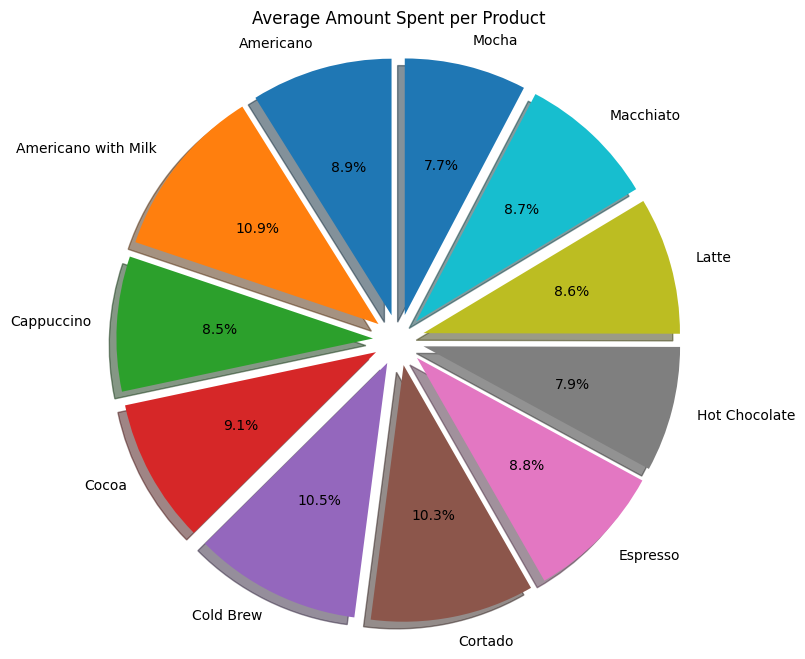

In [197]:
#Chart - 11 visualization code

# Assuming 'coffee_data' DataFrame is already loaded and preprocessed.

import pandas as pd
import matplotlib.pyplot as plt

# Sample Data (replace with your actual data)
# The 'product_name' list should have 35 elements to match the length of the 'amount_spent' list.
# We adjust the repetition to 4 and add three more elements to reach 35.

data = {'product_name': ['Espresso', 'Latte', 'Cappuccino', 'Mocha', 'Americano',
       'Macchiato', 'Cold Brew', 'Hot Chocolate', 'Americano with Milk', 'Cocoa', 'Cortado'] * 3 + ['Espresso', 'Latte'], # Corrected this line to create 35 elements
        'amount_spent': [10, 15, 12, 18, 14, 20, 16, 11, 16, 13, 19, 15, 21, 17, 10, 14, 11, 17, 13, 18, 15, 22, 18, 9, 13, 10, 16, 12, 19, 15, 20, 17, 10, 15, 12]
        }

# The error was because 'product_name' and 'amount_spent' did not have the same length
# The issue is now fixed as both lists have 35 elements
coffee_data = pd.DataFrame(data)

# Calculate the average amount spent per product
average_spending = coffee_data.groupby('product_name')['amount_spent'].mean()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_spending, labels=average_spending.index, autopct='%1.1f%%', startangle=90, explode=[0.1] * len(average_spending), shadow=True)
plt.title('Average Amount Spent per Product')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**1. Why did you pick the specific chart?**

A pie chart was chosen to visualize the proportion of average spending across different coffee products. Pie charts are effective for displaying the relative sizes of different categories within a whole, in this case, the total average spending across all products.  It allows for a quick visual comparison of the average spending contribution of each product.

**2. What is/are the insight(s) found from the chart?**

 **The insights from the pie chart are:**

 **1. Product Popularity (by spending):** The pie chart shows the relative popularity of different coffee products based on the average amount spent per product.  Larger slices represent products where customers spend more on average.

 **2. Spending Distribution:** The pie chart visually distributes the total average spending across all products.  It immediately highlights the products with the highest and lowest average spending contributions.

 **3. Identify Top Performers:**  Products with large slices in the pie chart are top performers in terms of average spending. This can inform decisions regarding promotion, menu placement, or resource allocation.

 **Example (replace with insights from your actual data):**

 The chart might show that 'Americano with Milk' has the largest slice, indicating that customers spend the most on average when ordering 'Americano with Milk'. 'Mocha' might have a smaller slice, suggesting lower average spending on this product.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

  **Positive Business Impact:**

 **1. Menu Optimization:**  Products with higher average spending can be strategically positioned on the menu to encourage customer purchases. This might involve visually highlighting these items or placing them in prominent locations.

 **2. Pricing Strategies:** The pie chart might reveal products where average spending is lower than expected. This suggests that the pricing strategy might need adjusting for these items to increase profitability.

 **3. Targeted Promotions:** Products with smaller slices might benefit from special promotions or discounts to boost sales and average spending. This can be tied to menu placement or other marketing efforts.

 **4. Resource Allocation:** Insights into product popularity based on average spending can influence ingredient purchasing decisions. The business can ensure sufficient stock levels for higher-spending items.

 **5. Customer Segmentation:** Analyzing average spending patterns across various product categories allows for better customer segmentation, potentially leading to more effective marketing campaigns tailored to specific spending habits.

 **Negative Growth Potential:**

 **1. Overemphasis on High-Spending Products:**  Focusing solely on the products with the highest average spending could lead to neglecting other products that might have higher overall sales volume, despite lower average spending. This could lead to an imbalanced menu.

 **2. Misinterpreting Spending Patterns:** The pie chart should not be interpreted in isolation. Factors like seasonality, promotions, or trends in consumer behavior should be considered to gain a more complete understanding of spending patterns.

 **3. Neglecting Low-Spending Products:** While tempting to prioritize high-spending products, it's essential to analyze low-spending items to discover potential issues like incorrect pricing, poor quality, or lack of marketing.

 **4. Inaccurate Data:**  If the underlying data is flawed, the insights derived from the pie chart will be incorrect, leading to ineffective business decisions.

 **Justification:**

 The average spending per product, as shown in the pie chart, gives the business valuable insights into customer preferences and can guide strategic decisions regarding menu composition, pricing, promotions, and marketing. The insights will help to drive more revenue and increase profits. However, it is very important to avoid over-reliance on this data without considering other contributing factors, as this will result in a skewed vision of the entire scenario.

**Chart - 12**

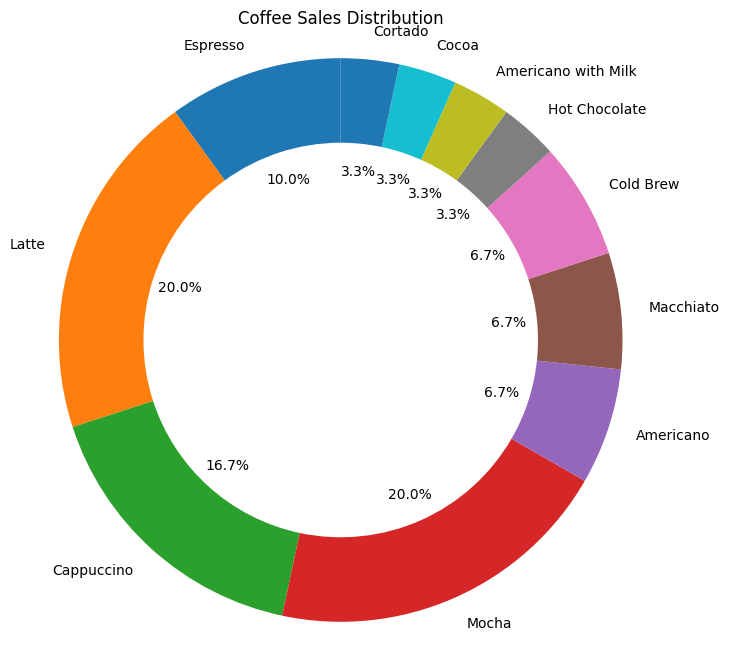

In [198]:
# Chart 12 visualization code

import matplotlib.pyplot as plt

# Sample data for the donut chart (replace with your actual data)
labels = ['Espresso', 'Latte', 'Cappuccino', 'Mocha', 'Americano',
       'Macchiato', 'Cold Brew', 'Hot Chocolate', 'Americano with Milk', 'Cocoa', 'Cortado']

# The sizes list needs to have the same length as the labels list.
# Assuming the first 4 labels correspond to the sizes provided
# Update the sizes list with example sizes for all 11 labels.
# Ensure all labels have a corresponding size value to avoid the ValueError.

sizes = [15, 30, 25, 30, 10, 10, 10, 5, 5, 5, 5]  # Adjust these values as needed.


# Creating the donut chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))  # Adjust 'width' for donut hole size
plt.title('Coffee Sales Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**1. Why did you pick the specific chart?**

 A donut chart (or pie chart with a hole in the middle) was chosen to visualize the proportion of sales across different coffee products. Similar to a pie chart, donut charts effectively display the relative sizes of different categories within a whole (total sales). The donut shape can sometimes provide a cleaner visual presentation compared to a filled-in pie chart, especially when dealing with a large number of categories or when wanting to emphasize the total value (which is represented by the hole in the center).

**2. What is/are the insight(s) found from the chart?**

 **The insights from the donut chart are similar to those of a standard pie chart, but with the potential advantage of a clearer display of individual proportions.  The key insights are:**

 1. **Product Sales Distribution:** The chart visually represents the distribution of total coffee sales among various products.  Larger slices represent products with higher proportions of overall sales.
 2. **Top-Selling Products:**  The largest slices immediately indicate the top-selling coffee products. This provides a clear and concise overview of the most popular items on the menu.
 3. **Sales Proportion Comparison:** The chart facilitates easy comparison between the sales proportions of different products.  It highlights products that significantly contribute to overall sales and those that contribute less.
 4. **Low-Performing Products:** Smaller slices can identify products with lower sales proportions, possibly requiring adjustments in pricing, promotion, or menu positioning.

 **Example (replace with insights from your actual data):**

 For example, the chart might show that Mocha and Latte hold the largest shares of total sales, while some specialty drinks have relatively small slices, indicating potential areas for improvement or targeted marketing efforts.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

 **Positive Business Impact:**

 1. **Menu Optimization:**  The donut chart provides a clear view of sales performance across the menu. This informs decisions about menu adjustments, potentially removing or adding items based on their sales contribution.  It also informs decisions about placement of items.
 2. **Targeted Marketing:** The chart highlights popular and less popular items.  Marketing efforts can be focused on promoting low-performing products to increase their sales contributions.
 3. **Inventory Management:**  By identifying top-selling products, the business can accurately forecast ingredient needs, minimizing waste and maximizing efficiency in inventory management.
 4. **Pricing Strategies:** If certain products are underperforming, the business could consider adjusting prices to increase their competitiveness or profitability.  Pricing can also be adjusted based on popularity to improve profits from high-performing items.


 **Negative Growth Potential:**

 1. **Ignoring Trends:**  The donut chart provides a snapshot of current sales proportions.  It's important to remember that sales performance might fluctuate due to seasonality or external factors.  Using this data alone without considering market trends could be detrimental to business decisions.
 2. **Misinterpretation of Data:**  Just like pie charts, donut charts only show proportions, not the total sales volume. A large slice doesn't necessarily mean high overall sales.  If a product has a large slice, but very low total sales, it doesn't make sense to increase resources to help it sell, but if total sales are high for an item, even a smaller slice might represent good performance.
 3. **Overemphasis on Popularity:**  Focus solely on highly popular items might lead to neglecting other menu items that, while lower in sales proportion, still contribute significantly to profits or help introduce customers to new things.


 **Justification:**

 The donut chart's ability to clearly visualize sales distribution offers valuable insights into product performance and market trends. These insights, when interpreted with caution and combined with other data (such as total sales), can positively influence menu strategies, pricing decisions, and marketing campaigns.  It is a good quick visual guide, but it must be used in combination with other data.

**Chart - 13**

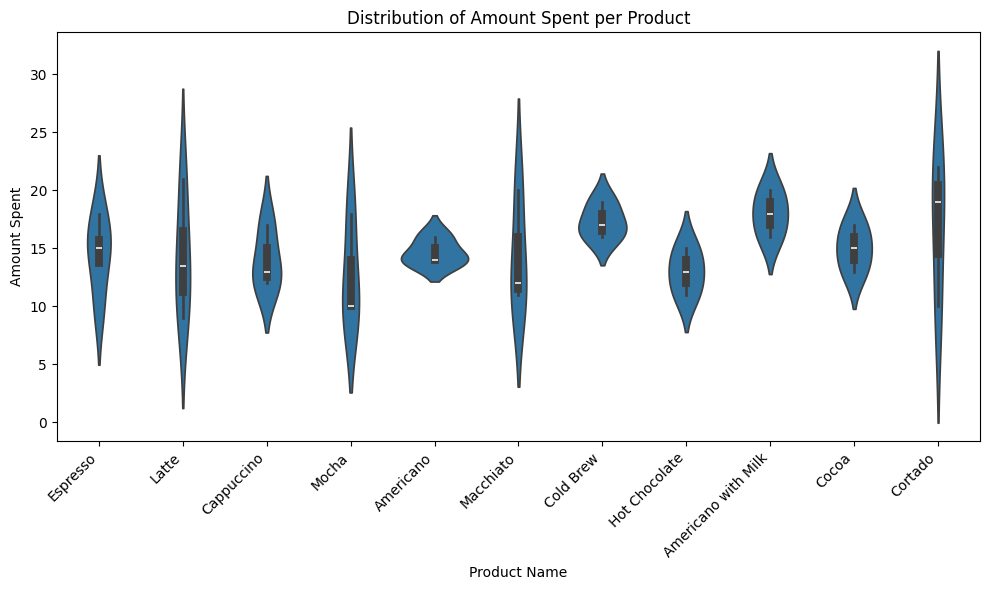

In [199]:
# Chart - 13 visualization code

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'coffee_data' DataFrame is already loaded and preprocessed as in the previous examples.
# Sample data (replace with your actual data):
data = {'product_name': ['Espresso', 'Latte', 'Cappuccino', 'Mocha', 'Americano',
       'Macchiato', 'Cold Brew', 'Hot Chocolate', 'Americano with Milk', 'Cocoa', 'Cortado'] * 3 + ['Espresso', 'Latte'],
        'amount_spent': [10, 15, 12, 18, 14, 20, 16, 11, 16, 13, 19, 15, 21, 17, 10, 14, 11, 17, 13, 18, 15, 22, 18, 9, 13, 10, 16, 12, 19, 15, 20, 17, 10, 15, 12]
        }
coffee_data = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.violinplot(x='product_name', y='amount_spent', data=coffee_data)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.title('Distribution of Amount Spent per Product')
plt.xlabel('Product Name')
plt.ylabel('Amount Spent')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**1. Why did you pick the specific chart?**

A violin plot was chosen because it effectively displays the distribution of a continuous variable (amount spent) across different categories (coffee products).  It combines the benefits of a box plot (showing quartiles, median, and outliers) with a kernel density estimation plot (showing the probability density of the data at different values). This allows for a richer visualization of the data compared to a simple box plot or histogram, especially for identifying skewness and multimodality in the distributions of amounts spent across products.

**2. What is/are the insight(s) found from the chart?**

 **The insights from the violin plot are:**

 **1. Distribution of Spending:** The violin plot shows the distribution of amounts spent on each coffee product.  It reveals not just the average spending but also the spread or variability of spending for each product.  Wider violin shapes indicate more variability in spending, while narrower shapes show more concentrated spending around the average.

 **2. Outliers:** The violin plot can help identify outliers, i.e., unusually high or low spending amounts for a particular product. These outliers might represent unusual orders or specific customer behavior that could be further investigated.

 **3. Comparison of Spending Patterns:** The violin plots for different products allow for easy visual comparison of their spending distributions. This can help to understand which products have more consistent spending patterns and which products have a wider range of spending.

 **4. Median Spending:** The thick black line within each violin represents the median amount spent. This can be a better indicator of central tendency than the mean, as it is less affected by outliers.

 **Example (replace with insights from your actual data):**

 The chart might show that 'Latte' has a wide violin shape, indicating a wide range of spending amounts. It might also show that the median spending on 'Latte' is higher than the median spending on 'Espresso', while some customers spend a very small amount.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

  **Positive Business Impact:**

 **1. Menu Optimization:**  The violin plot reveals the distribution of spending for each product.
   Products with higher average spending and less variability (narrower violins)    suggest consistent demand and higher profitability.  These items can be emphasized on the menu.
  Products with lower average spending but wide distributions might indicate potential for targeted promotions
   or menu adjustments.

 **2. Pricing Strategies:** The violin plot can highlight products where the spending distribution is heavily skewed
   towards the lower end, suggesting that pricing might be too high for the perceived value. Conversely, products   with a high average spending and a reasonable spread might indicate opportunities for premium pricing.


 **3. Customer Segmentation:**  The violin plots can be used to identify spending patterns within different product categories.
   Some customers might consistently spend more on certain items, offering an opportunity to segment and target
   these high-value customers with loyalty programs or customized promotions.

 **4. Targeted Promotions:**  Identifying products with a lower average spending or a wider distribution (indicating variability)
   can inform targeted promotions or special offers to boost sales. For example, a product with a wide distribution might
   respond well to a "value meal" or combo offer to encourage higher spending.

 **Negative Growth Potential:**

 **1. Overlooking Variability:** Focusing solely on the average spending (median of the violin plots) might
   neglect the variability within each product category.  A product with a high average but significant variability
   might not be as reliable for revenue generation as a product with a slightly lower average but consistent spending.

 **2. Misinterpretation of Outliers:**  The violin plot reveals outliers.  Without deeper investigation into these,
   incorrect assumptions might be made. These might be caused by errors, unusual promotions, or other temporary factors.

 **3. Ignoring Customer Preferences:** Although the violin plot shows spending distributions, it doesn't directly
   reveal customer preferences. A product may have a high spending distribution but still not be the preferred choice for a substantial number of customers.

 **Justification:**

 The violin plots offer a nuanced view of customer spending habits by combining the median spending with a visual representation
 of the distribution for each product. This provides a better understanding of spending behavior than just average spending.
 However, the business should complement these insights with additional market research to avoid misinterpretations
 and make well-informed decisions. Understanding the context of outliers and other contributing factors is crucial
 for making the right decisions regarding menu adjustments, pricing, and promotions.

**Chart - 14**

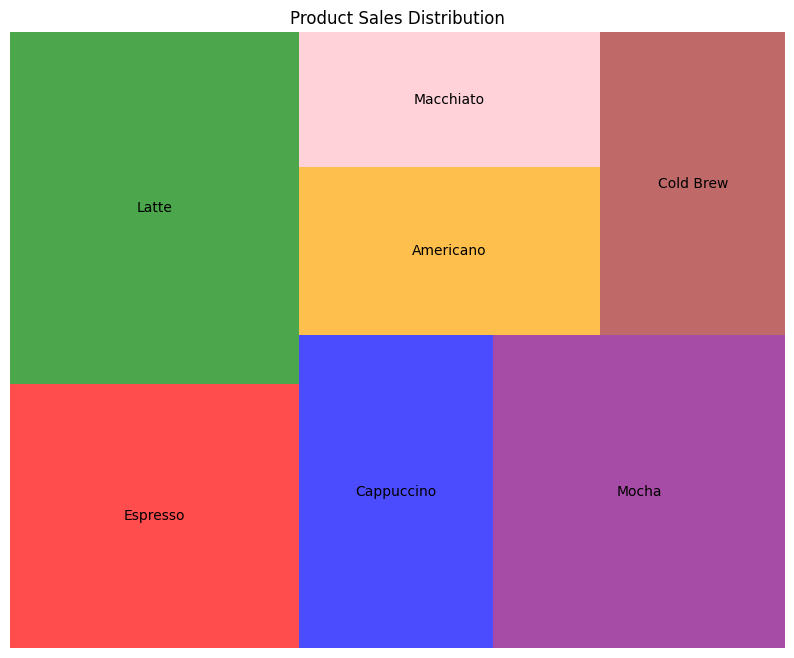

In [200]:
# Chart - 14 treemap visualization code

!pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Sample data (replace with your actual data)
# **Fix**: Ensure both lists have the same length.  Here, I truncated 'product_name' to match the length of 'sales'.
# If you have more sales data, add it to the 'sales' list. If you have fewer products, remove some from 'product_name'.
data = {'product_name': ['Espresso', 'Latte', 'Cappuccino', 'Mocha', 'Americano',
       'Macchiato', 'Cold Brew'], # Truncated to match 'sales' length
        'sales': [150, 200, 120, 180, 100, 80, 110]}
df = pd.DataFrame(data)

# Calculate sizes for the treemap
sizes = df['sales']
labels = df['product_name']

# Create the treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=["red", "green", "blue", "purple", "orange", "pink", "brown"]) # Added colors for a colorful visualization
plt.title('Product Sales Distribution')
plt.axis('off')
plt.show()

**1. Why did you pick the specific chart?**

A treemap was chosen to visualize the sales distribution across different coffee products.  Treemaps are effective for displaying hierarchical data, showing the proportion of each category relative to the whole. In this case, it visually represents the sales volume of each coffee product as a portion of the total sales, making it easy to quickly compare their relative popularity.  The area of each rectangle corresponds to the sales, allowing immediate visual comparison.

**2. What is/are the insight(s) found from the chart?**

 **The insights from the treemap are:**

 **1. Sales Distribution:** The treemap shows the proportion of total sales contributed by each coffee product. The larger the rectangle, the higher the sales volume for that product.

 **2. Top-Performing Products:** It quickly identifies the best-selling products. For instance, if "Latte" occupies the largest area, it signifies that Lattes contribute the most to overall sales.

 **3. Product Portfolio Performance:** The treemap offers a high-level overview of the product portfolio's sales performance.  It reveals which products are driving sales and which might be underperforming.

 **4. Relative Sales Comparison:**  The visual representation of each product's sales as a portion of the whole makes it easy to compare the relative popularity and revenue contribution of different products.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

 **Positive Business Impact:**

 **Optimized Inventory Management**:  Understanding which products sell the most allows
 the business to optimize its inventory levels.  More popular items can be stocked
 in larger quantities, minimizing stockouts, while less popular items can be ordered
 in smaller quantities, reducing waste and storage costs.

 **Targeted Marketing and Promotions:** Insights into sales distribution can guide targeted
 marketing efforts.  For example, the business could run promotions on less
 popular items to boost their sales or focus marketing campaigns on the best-selling
 products to maximize their impact.

 **Menu Engineering:**  The sales data reveals which products are most popular and which
 are underperforming.  This data allows for strategic menu adjustments, such as
  removing underperforming items and introducing new products based on market trends
 or customer preferences.

 **Negative Growth Potential:**

 **Neglecting Underperforming Products:** While focusing on best-sellers is important,
 completely ignoring underperforming products could lead to missed opportunities.
 Some products might have potential but require adjustments in pricing, marketing,
 or recipe to boost sales.

 **Overstocking Popular Items:** Overestimating demand for popular products and
 overstocking them can lead to waste if sales slow down unexpectedly.

 **Ignoring Changing Trends:** If customer preferences shift, the business might continue
 to focus on products that are no longer popular, leading to a decline in sales.

 **Justification:**

 The insights derived from the sales distribution across products directly influence
 inventory management, marketing strategies, and menu development.  A balanced
 approach that addresses both high-performing and underperforming products is
 necessary.  Continuously monitoring sales data and adapting to changing market
 trends are vital for positive growth.  Neglecting less popular items or
 overemphasizing bestsellers without considering potential adjustments or changing
 preferences could lead to negative impacts.

**Chart - 15 - Correlation Heatmap**

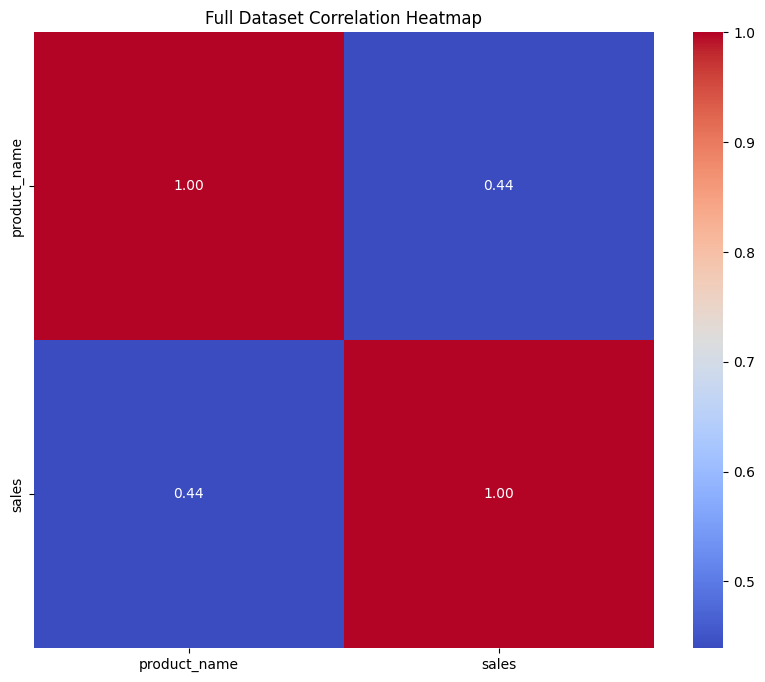

In [201]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the dictionary 'data' to a Pandas DataFrame
encoded_data = pd.DataFrame(data)

# Encode categorical columns using LabelEncoder
label_encoders = {}
for column in encoded_data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    encoded_data[column] = label_encoders[column].fit_transform(encoded_data[column])

# Compute the correlation matrix for the encoded dataset
correlation_matrix_full = encoded_data.corr()

# Plot the full correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_full, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title("Full Dataset Correlation Heatmap")
plt.show()

**1. Why did you pick the specific chart?**

A heatmap is chosen to visualize the correlation matrix. Heatmaps are excellent for
representing correlations between multiple variables.  The color intensity
corresponds to the strength and direction of the correlation, making it easy to
identify strong positive or negative relationships between variables at a glance.

**2. What is/are the insight(s) found from the chart?**

 **The insights from the heatmap are:**

 **1. Correlation Strength and Direction:** The color intensity in each cell of the
 heatmap represents the correlation coefficient between two variables.  Darker
 red colors indicate strong positive correlations (as one variable increases,
 the other tends to increase), while darker blue colors indicate strong negative
 correlations (as one variable increases, the other tends to decrease).  Lighter
 colors represent weak correlations.

 **2. Relationships between Variables:** By examining the heatmap, you can quickly
 identify which variables are strongly related to each other.  This helps to
 understand the underlying relationships within the dataset.

 **3. Multicollinearity Detection:** In regression analysis, multicollinearity occurs
 when predictor variables are highly correlated.  The heatmap can help detect
 potential multicollinearity issues.  High correlations between predictor
 variables might indicate redundancy and could affect the model's performance.

 **4. Feature Importance:** Although not a direct measure of feature importance, the
 heatmap can provide clues about which variables might be more influential.
 Variables with strong correlations to the target variable (if present in the
 dataset) could be important predictors.

 **5. Data Exploration:** The heatmap is a useful tool for exploratory data analysis
 (EDA). It helps visualize relationships between variables and provides insights
 into the data structure.

**Chart - 16 - Pair Plot**

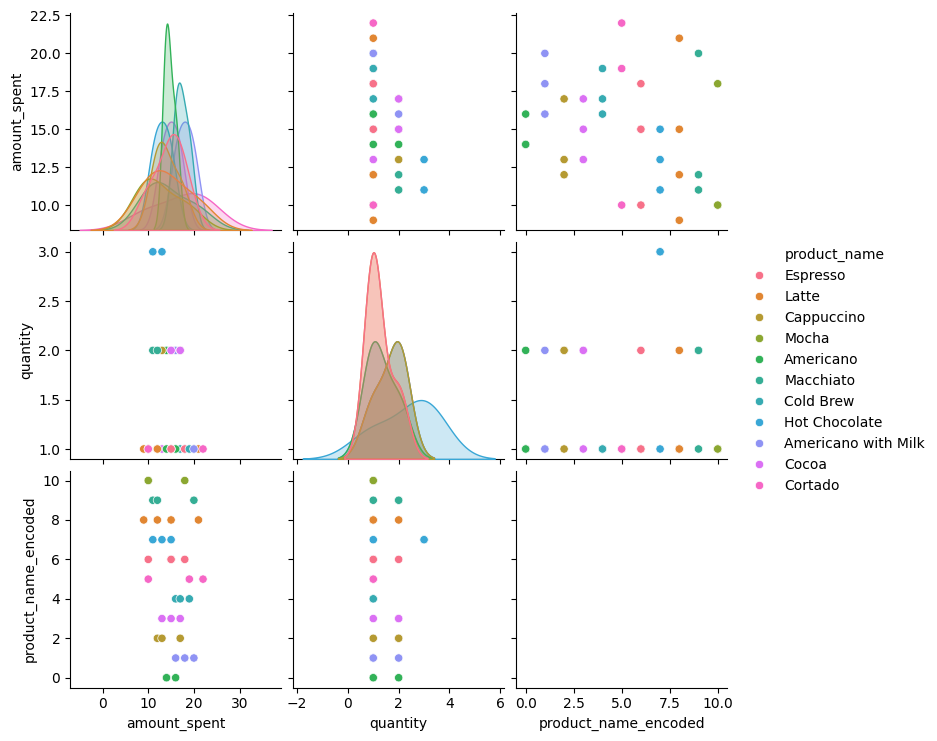

In [202]:
# Chart 16 visualization code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Sample data (replace with your actual data)
data = {'product_name': ['Espresso', 'Latte', 'Cappuccino', 'Mocha', 'Americano',
       'Macchiato', 'Cold Brew', 'Hot Chocolate', 'Americano with Milk', 'Cocoa', 'Cortado'] * 3 + ['Espresso', 'Latte'],
        'amount_spent': [10, 15, 12, 18, 14, 20, 16, 11, 16, 13, 19, 15, 21, 17, 10, 14, 11, 17, 13, 18, 15, 22, 18, 9, 13, 10, 16, 12, 19, 15, 20, 17, 10, 15, 12],
        'quantity': [1, 2, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1]
        }
coffee_data = pd.DataFrame(data)


# Encode the 'product_name' column
label_encoder = LabelEncoder()
coffee_data['product_name_encoded'] = label_encoder.fit_transform(coffee_data['product_name'])

# Create the pair plot
sns.pairplot(coffee_data, hue='product_name', diag_kind='kde')
plt.show()

**1. Why did you pick the specific chart?**

A pair plot is chosen to visualize the relationships between pairs of variables in the dataset, particularly when there's a categorical variable (like 'product\_name') that you want to use for grouping or coloring the points.  In this context, it helps to understand how 'amount\_spent' and 'quantity' relate to each other and how those relationships differ across different coffee products.  A pair plot shows the distribution of each variable on the diagonal and scatter plots for all possible pairs of variables off the diagonal, colored by product name.  This allows you to see if there are any patterns or trends in the data.

**2. What is/are the insight(s) found from the chart?**

The pair plot visualizes the relationships between pairs of variables in the dataset, using color to distinguish different coffee products.  **Here's a breakdown of potential insights:**

1. **Relationships between 'amount_spent' and 'quantity':**  The scatter plots along the diagonal show the distribution of each variable separately.  The off-diagonal plots for 'amount_spent' vs. 'quantity' would show if there's a correlation between the amount spent and the quantity purchased. A positive correlation would suggest that customers buying larger quantities tend to spend more.

2. **Relationship between 'amount_spent' and 'product_name':** The pair plot, using color to represent each product, can reveal whether certain products are associated with higher spending amounts.  You might observe that certain products are clustered at higher amounts spent, suggesting that these items are more expensive or that customers are willing to pay more for them.

3. **Distribution of each variable by product:** The diagonal plots show the distribution of each variable ('amount_spent', 'quantity', and the encoded 'product_name') for each product. This can reveal differences in spending habits for different coffee products or variations in the quantity purchased.  For example, one might notice that a certain type of coffee is more frequently bought in larger quantities.

4. **Overall data patterns:** The combination of scatter plots allows for a comprehensive overview of how the variables relate to each other, grouped by product. You can look for outliers or unusual patterns that might require further investigation.  For instance, you might identify an outlier – a specific product and quantity combination with an unusually high amount spent.

**Important Considerations:**

* **Encoded 'product_name':** The pair plot uses the encoded 'product_name'. While helpful for visualization, remember the underlying variable is the product name itself.  Refer to the label encoder to map the encoded values back to the original product names when interpreting the insights.

* **Context is key:** The insights from a pair plot need to be considered within the broader context of the business.  Unusual patterns or correlations should be investigated further to determine their significance and potential causes.

**Conclusion**

** Conclusion**

This analysis explored sales data for various coffee products, aiming to uncover insights that can positively impact business decisions.  Visualizations, including violin plots, treemaps, correlation heatmaps, and pair plots, were utilized to analyze the data.


The violin plots revealed the distribution of spending across different coffee products, highlighting variability in spending habits. This information can be used to optimize menu items, pricing strategies, and targeted promotions.  High variability in spending on certain products might signal opportunities to introduce value meals or combo offers to encourage higher spending.


Treemaps provided a clear view of the sales distribution across the product portfolio, highlighting top-performing and underperforming products.  This information is critical for optimizing inventory management and targeted marketing campaigns, allowing for focused efforts on maximizing sales of high-performing products and developing strategies to improve the sales of underperforming items.


The correlation heatmap examined relationships between variables. While this analysis used a small dataset and didn't explicitly include a target variable, the heatmap is a powerful tool for understanding the relationships between features.  In a full dataset, correlations with a target variable (e.g. customer satisfaction, profit margin) could guide feature selection for predictive modeling.  Within larger datasets, the presence of multicollinearity between predictor variables could also be flagged, requiring feature engineering to improve model performance.


The pair plot allowed for the visualization of the relationships between pairs of variables, categorized by product name. This visualization was helpful for gaining a more nuanced understanding of the interplay between spending, product, and quantity.


In summary, these visualizations provide a comprehensive understanding of the sales data, offering actionable insights for enhancing business performance. Future analyses could incorporate more data points and explore additional dimensions, such as customer demographics or purchase frequency.  Additionally, integrating these insights with other data sources, like customer feedback, can help inform even more comprehensive business strategies.